# *Merged Jupyter Notebook*

<hr><font color="green"><h1>from file: ATom Petty's Masterclass; Base Jumping (Finished Product)</h1></font>

## Import items I need and open/inspect dataframe

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
%matplotlib inline

In [88]:
df = pd.read_csv("../../../data/kc_house_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [89]:
df["sqft_basement"] = df["sqft_basement"].replace("0.0", np.nan)
df["sqft_basement"] = df["sqft_basement"].replace("?", np.nan)
df["sqft_basement"] = df["sqft_basement"].fillna(0.0)
df["sqft_basement"] = df["sqft_basement"].map(lambda x: float(x))
# Square feet basement had a lot of issues that I found to clean, I compressed the cleaning of this column to this cell.

In [90]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [91]:
df = df.drop(["lat", "long", "view", "id"], axis = 1)
# I am interested in creating an inferential statistic so I discarded any column that the home owner would not
# have much if any control over.

In [92]:
df["year_sold"] = df["date"].map(lambda x: x.split("/")[2])
df["date"] = df["date"].map(lambda x: x.split("/")[0])
# The specific date of the sale isn't of interest but the season is.

In [93]:
df = df.drop_duplicates()

In [94]:
df["waterfront"] = df["waterfront"].fillna(0.0)

In [95]:
df["yr_renovated"] = df["yr_renovated"].fillna(0.0)

In [96]:
df["date"] = df["date"].map(lambda x: int(x))

In [97]:
df["year_sold"] = df["year_sold"].map(lambda x: int(x))

In [98]:
df["yrs_since_built"] = np.abs(df["year_sold"] - df["yr_built"])

In [99]:
df["yrs_since_renovated"] = df["year_sold"] - df["yr_renovated"] 
df.head()
# I wanted to see if there was any corelation between how recently "serviced" a house had been with how much it sold for.

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0    10  221900.0         3       1.00         1180      5650     1.0   
1    12  538000.0         3       2.25         2570      7242     2.0   
2     2  180000.0         2       1.00          770     10000     1.0   
3    12  604000.0         4       3.00         1960      5000     1.0   
4     2  510000.0         3       2.00         1680      8080     1.0   

   waterfront  condition  grade  sqft_above  sqft_basement  yr_built  \
0         0.0          3      7        1180            0.0      1955   
1         0.0          3      7        2170          400.0      1951   
2         0.0          3      6         770            0.0      1933   
3         0.0          5      7        1050          910.0      1965   
4         0.0          3      8        1680            0.0      1987   

   yr_renovated  zipcode  sqft_living15  sqft_lot15  year_sold  \
0           0.0    98178           1340        5650       2014   
1        1991.0    98125           1690        7639       2014   
2           0.0    98028           2720        8062       2015   
3           0.0    98136           1360        5000       2014   
4           0.0    98074           1800        7503       2015   

   yrs_since_built  yrs_since_renovated  
0               59               2014.0  
1               63                 23.0  
2               82               2015.0  
3               49               2014.0  
4               28               2015.0

In [100]:
df["year_sold"].iloc[0]
# making sure code works the way I want it to

2014

In [101]:
while df["yrs_since_renovated"].loc[df["yrs_since_renovated"]==0].count() > 0:
    for i in range(0, len(df)):
        if df["year_sold"].iloc[i] == df["yrs_since_renovated"].iloc[i]:
            df["yrs_since_renovated"].iloc[i] = df["yrs_since_built"].iloc[i]
        elif df["yrs_since_renovated"].iloc[i] == 0.0:
            df["yrs_since_renovated"].iloc[i] = 0.1
# Python tried to fend off my assault of odd code, but it made the fatal error of telling me that the code works just
# not every time. So I just had to leverage the coding equivalent of a sledgehammer also known as a while statement.

/Users/jerryhudspeth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/jerryhudspeth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [102]:
df["sqft_living_per_bathroom"] = df["sqft_living"]/df["bathrooms"]
df["sqft_living_per_bedroom"] = df["sqft_living"]/df["bedrooms"]

In [103]:
df = df.drop(["yr_renovated", "yr_built", "year_sold", "yrs_since_built", "sqft_lot"], axis = 1)
df.head()
# I no longer need these plebian columns, I have found what I wanted. Culling the herd is an important task

date     price  bedrooms  bathrooms  sqft_living  floors  waterfront  \
0    10  221900.0         3       1.00         1180     1.0         0.0   
1    12  538000.0         3       2.25         2570     2.0         0.0   
2     2  180000.0         2       1.00          770     1.0         0.0   
3    12  604000.0         4       3.00         1960     1.0         0.0   
4     2  510000.0         3       2.00         1680     1.0         0.0   

   condition  grade  sqft_above  sqft_basement  zipcode  sqft_living15  \
0          3      7        1180            0.0    98178           1340   
1          3      7        2170          400.0    98125           1690   
2          3      6         770            0.0    98028           2720   
3          5      7        1050          910.0    98136           1360   
4          3      8        1680            0.0    98074           1800   

   sqft_lot15  yrs_since_renovated  sqft_living_per_bathroom  \
0        5650                 59.0               1180.000000   
1        7639                 23.0               1142.222222   
2        8062                 82.0                770.000000   
3        5000                 49.0                653.333333   
4        7503                 28.0                840.000000   

   sqft_living_per_bedroom  
0               393.333333  
1               856.666667  
2               385.000000  
3               490.000000  
4               560.000000

In [104]:
for i in range(0, len(df)):
    if df["date"].iloc[i] == 1:
        df["date"].iloc[i] = 4
    elif df["date"].iloc[i] == 2:
        df["date"].iloc[i] = 4
    elif df["date"].iloc[i] == 3:
        df["date"].iloc[i] = 1
    elif df["date"].iloc[i] == 4:
        df["date"].iloc[i] = 1
    elif df["date"].iloc[i] == 5:
        df["date"].iloc[i] = 1
    elif df["date"].iloc[i] == 6:
        df["date"].iloc[i] = 2
    elif df["date"].iloc[i] == 7:
        df["date"].iloc[i] = 2
    elif df["date"].iloc[i] == 8:
        df["date"].iloc[i] = 2
    elif df["date"].iloc[i] == 9:
        df["date"].iloc[i] = 3
    elif df["date"].iloc[i] == 10:
        df["date"].iloc[i] = 3
    elif df["date"].iloc[i] == 11:
        df["date"].iloc[i] = 3
    elif df["date"].iloc[i] == 12:
        df["date"].iloc[i] = 4
        
    
    
# Making the season list, 1:spring 3-5, 2:summer = 6-8, 3:fall = 9-11, 4:winter = 12-2

/Users/jerryhudspeth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [105]:
df = df.rename(columns = {"date": "season"})

In [106]:
while df["sqft_basement"].loc[df["sqft_basement"] == 0].count() > 0:
    for i in range(0, len(df)):
        if df["sqft_basement"].iloc[i] == 0:
            df["sqft_basement"].iloc[i] = 0.1
# Here I am, back on my sus code game. This particular code was written as I needed to normalize the data I was working
# with by "logging it" and you cannot take the log of 0 as it approaches negative infinty.

/Users/jerryhudspeth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [107]:
continuous = ["sqft_above", "yrs_since_renovated", "price", "sqft_living", "sqft_basement", "sqft_living15", "sqft_lot15"]

categorical = ["floors", "season", "bedrooms", "bathrooms", "grade", "condition", "waterfront", "zipcode"]

df["bathrooms"] = df["bathrooms"].apply(lambda x: int(x*100))
df["floors"] = df["floors"].apply(lambda x: int(x*10))
df["waterfront"] = df["waterfront"].apply(lambda x: int(x))

df_log = np.log(df[continuous])
df_log.columns = [f"{column}_log" for column in df[continuous]]

    
df_norm = (df_log - np.mean(df_log))/np.std(df_log)
df_norm.columns = [f"{column}_log" for column in df[continuous]]

df_ohe = pd.get_dummies(df[categorical], prefix = categorical, columns = categorical, drop_first = True)

df_final = pd.concat([df_norm, df_ohe], axis = 1)
# Gotta make sure that if the data looks normal so time to standardize and normalize for some big lad graphs!

<ipython-input-107-083e01e45c39>:9: RuntimeWarning: invalid value encountered in log
  df_log = np.log(df[continuous])


In [108]:
df_final["sqft_living_log_per_bedroom"] = df_final["sqft_living_log"]/df["bedrooms"]
df_final["sqft_living_log_per_bathroom"] = df_final["sqft_living_log"]/df["bathrooms"]
df_final
# I had initially put sqft_living_per_bedroom/bathroom directly into the log function but bedroom and bathroom are
# categorical data and as a result shouldn't be logged

sqft_above_log  yrs_since_renovated_log  price_log  sqft_living_log  \
0           -0.753718                 0.622233  -1.402046        -1.125686   
1            0.672632                -0.111935   0.279901         0.709373   
2           -1.753170                 0.878776  -1.799481        -2.132055   
3           -1.027004                 0.477497   0.499662         0.070581   
4            0.073415                 0.041368   0.178395        -0.292830   
...               ...                      ...        ...              ...   
21592       -0.145557                -1.301246  -0.483091        -0.513317   
21593        0.819011                -2.555539  -0.282996         0.457926   
21594       -1.094873                -1.301246  -0.273047        -1.469202   
21595       -0.040817                -0.686773  -0.282996        -0.407853   
21596       -1.094873                -1.159156  -0.677334        -1.469202   

       sqft_basement_log  sqft_living15_log  sqft_lot15_log  floors_15  \
0              -0.787973          -1.035598       -0.395767          0   
1               1.153551          -0.326910       -0.024514          0   
2              -0.787973           1.126457        0.041825          0   
3               1.345965          -0.990354       -0.546204          0   
4              -0.787973          -0.134336       -0.046626          0   
...                  ...                ...             ...        ...   
21592          -0.787973          -0.630655       -2.020809          0   
21593          -0.787973          -0.083857       -0.097366          0   
21594          -0.787973          -1.868909       -1.669764          0   
21595          -0.787973          -0.880092       -2.216686          0   
21596          -0.787973          -1.868909       -2.151494          0   

       floors_20  floors_25  ...  zipcode_98155  zipcode_98166  zipcode_98168  \
0              0          0  ...              0              0              0   
1              1          0  ...              0              0              0   
2              0          0  ...              0              0              0   
3              0          0  ...              0              0              0   
4              0          0  ...              0              0              0   
...          ...        ...  ...            ...            ...            ...   
21592          0          0  ...              0              0              0   
21593          1          0  ...              0              0              0   
21594          1          0  ...              0              0              0   
21595          1          0  ...              0              0              0   
21596          1          0  ...              0              0              0   

       zipcode_98177  zipcode_98178  zipcode_98188  zipcode_98198  \
0                  0              1              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
21592              0              0              0              0   
21593              0              0              0              0   
21594              0              0              0              0   
21595              0              0              0              0   
21596              0              0              0              0   

       zipcode_98199  sqft_living_log_per_bedroom  \
0                  0                    -0.375229   
1                  0                     0.236458   
2                  0                    -1.066027   
3                  0                     0.017645   
4                  0                    -0.097610   
...              ...                          ...   
21592   

## Graphing to check for heteroscadacity, predictions, and normality

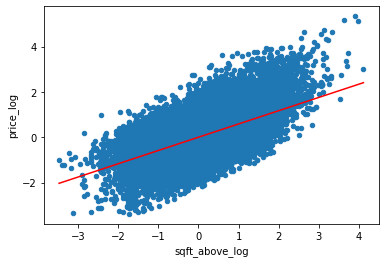

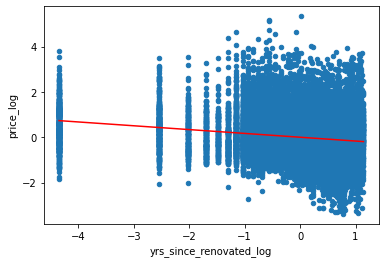

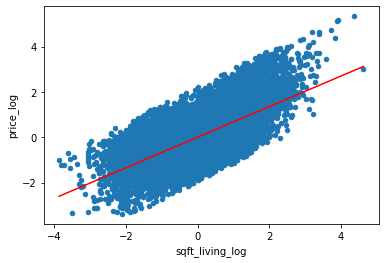

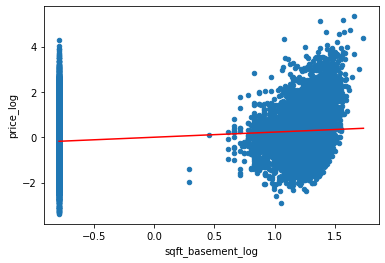

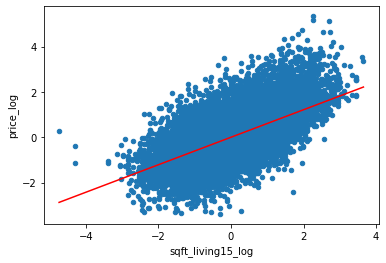

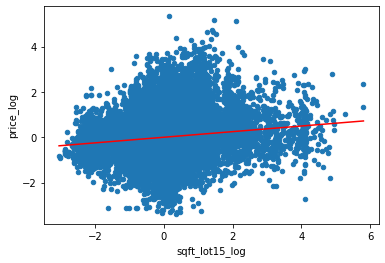

In [23]:
for col in df_final[df_log.columns].drop("price_log", axis = 1):
    model = ols(formula = f"price_log ~ {col}", data = df_final[df_log.columns]).fit()
    df_predict = pd.DataFrame({f"{col}": [df_final[col].min(), df_final[col].max()]})
    df_final[df_log.columns].plot(kind = "scatter", x = f"{col}", y = "price_log")
    plt.plot(df_predict, model.predict(df_predict), color = "red")
    
# Prediction line graph

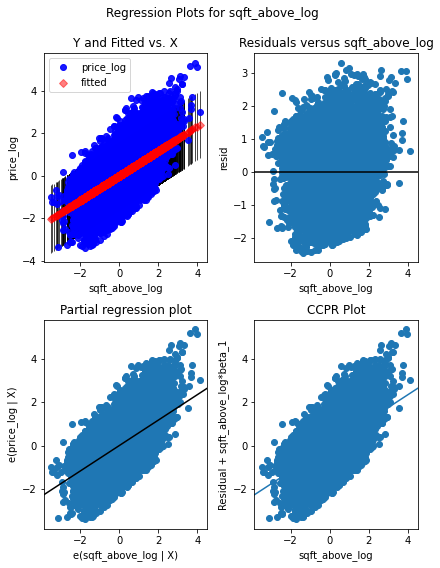

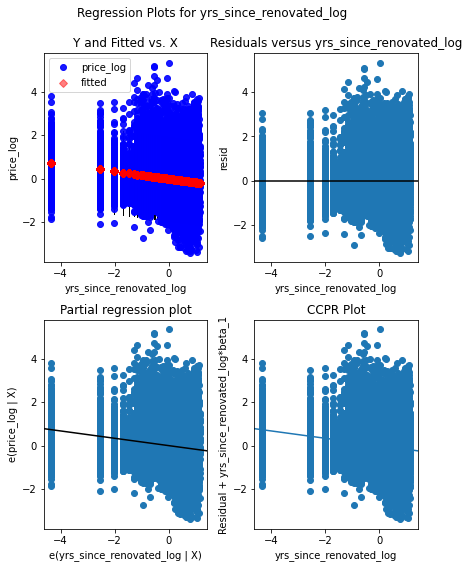

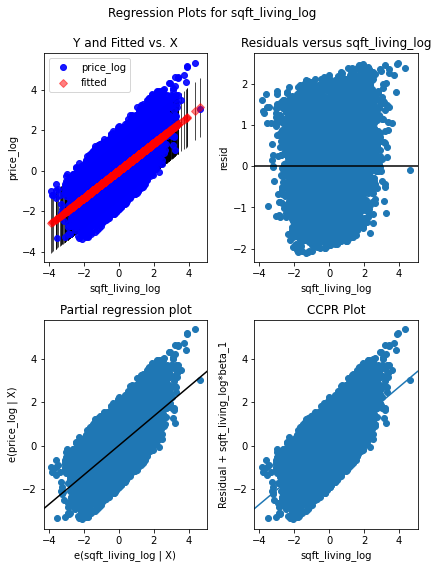

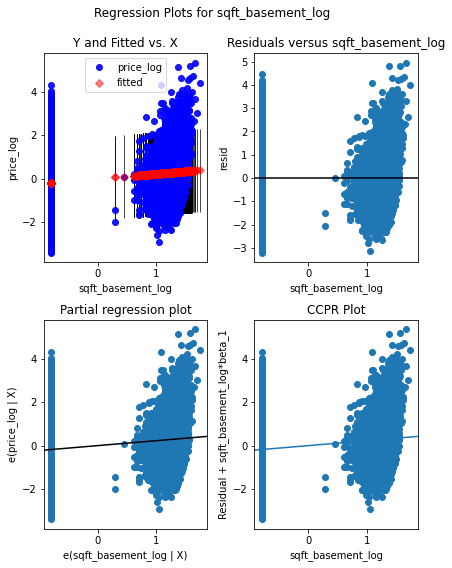

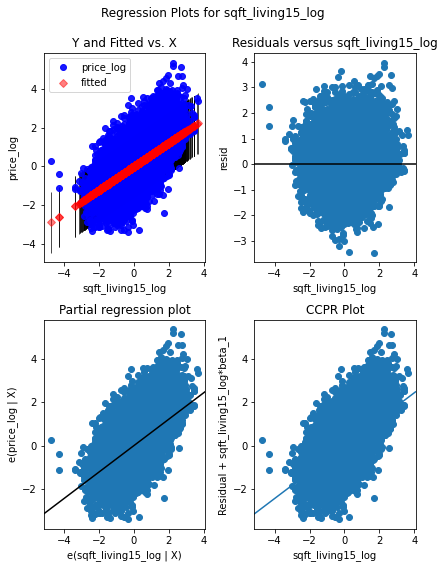

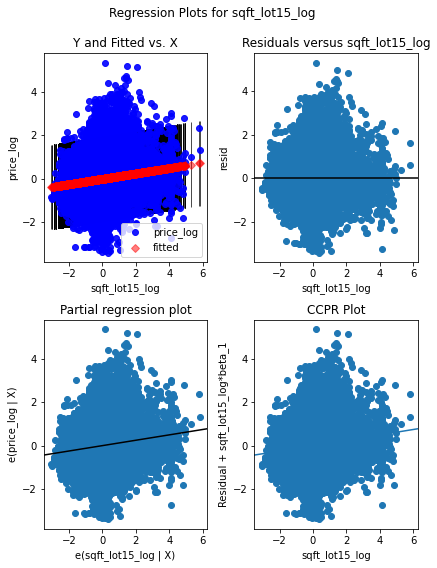

In [24]:
for col in df_final[df_log.columns].drop("price_log", axis = 1):
    model = ols(formula = f"price_log ~ {col}", data = df_final[df_log.columns]).fit()
    
    fig = plt.figure(figsize = (6,8))
    fig = sm.graphics.plot_regress_exog(model, f"{col}", fig = fig);
    
# Examining error and heteroscadasity graphs

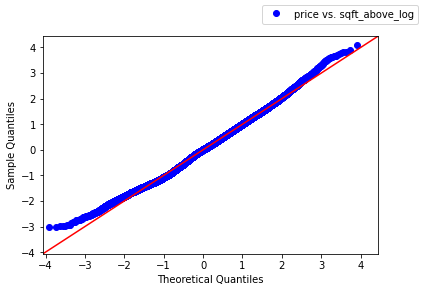

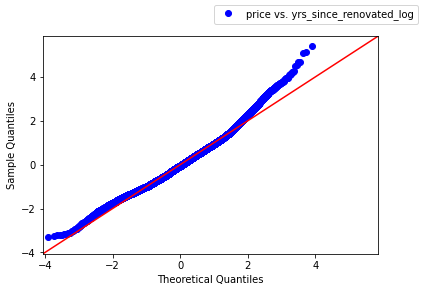

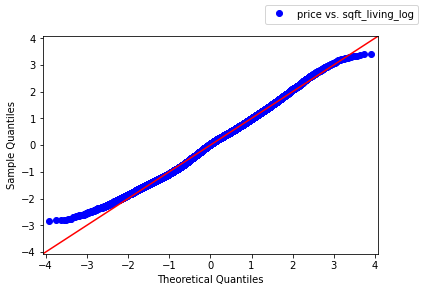

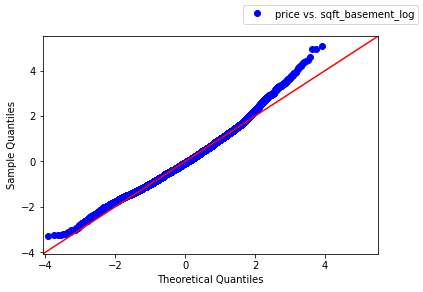

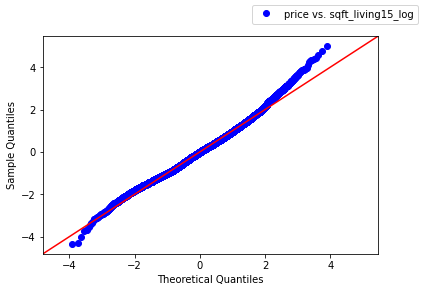

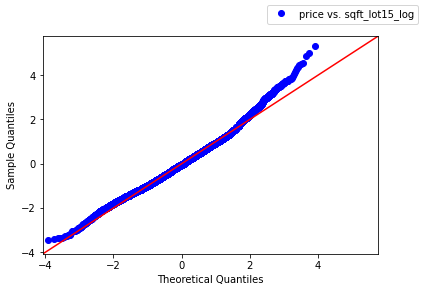

In [25]:
for predictor in df_final[df_log.columns].drop("price_log", axis = 1):
    model = ols(formula = f"price_log ~ {predictor}", data = df_final[df_log.columns]).fit()
    
    fig = sm.graphics.qqplot(model.resid, dist = stats.norm, fit = True, line = "45", label = f"price vs. {predictor}")
    fig.legend();
    
    # QQ plot graphs to check for normal shapes

In [109]:
df_final["price"] = df["price"]
df_final = df_final.drop("price_log", axis = 1)

In [110]:
df_final["sqft_basement_log"]

0       -0.787973
1        1.153551
2       -0.787973
3        1.345965
4       -0.787973
           ...   
21592   -0.787973
21593   -0.787973
21594   -0.787973
21595   -0.787973
21596   -0.787973
Name: sqft_basement_log, Length: 21595, dtype: float64

In [111]:
df_final["yrs_since_renovated_log"].fillna(-1, inplace = True)
df_final["bathrooms"] = df["bathrooms"]
df_final["bedrooms"] = df["bedrooms"]

In [112]:
while df_final["sqft_basement_log"].loc[df_final["sqft_basement_log"] == -0.78797255].count() > 0:
    for i in range(0, len(df_final)):
        if df_final["sqft_basement_log"].iloc[i] == -0.78797255:
            df_final["sqft_basement_log"].iloc[i] = -2
# log base e of 0 on a graph could be read as -1. It technically goes to negative infinity but -2 will have to suffice for my estimations.

In [113]:
df_final["yrs_since_renovated_log"].loc[(np.isfinite(df_final["yrs_since_renovated_log"]) == False)]

Series([], Name: yrs_since_renovated_log, dtype: float64)

In [114]:
df_final

sqft_above_log  yrs_since_renovated_log  sqft_living_log  \
0           -0.753718                 0.622233        -1.125686   
1            0.672632                -0.111935         0.709373   
2           -1.753170                 0.878776        -2.132055   
3           -1.027004                 0.477497         0.070581   
4            0.073415                 0.041368        -0.292830   
...               ...                      ...              ...   
21592       -0.145557                -1.301246        -0.513317   
21593        0.819011                -2.555539         0.457926   
21594       -1.094873                -1.301246        -1.469202   
21595       -0.040817                -0.686773        -0.407853   
21596       -1.094873                -1.159156        -1.469202   

       sqft_basement_log  sqft_living15_log  sqft_lot15_log  floors_15  \
0              -0.787973          -1.035598       -0.395767          0   
1               1.153551          -0.326910       -0.024514          0   
2              -0.787973           1.126457        0.041825          0   
3               1.345965          -0.990354       -0.546204          0   
4              -0.787973          -0.134336       -0.046626          0   
...                  ...                ...             ...        ...   
21592          -0.787973          -0.630655       -2.020809          0   
21593          -0.787973          -0.083857       -0.097366          0   
21594          -0.787973          -1.868909       -1.669764          0   
21595          -0.787973          -0.880092       -2.216686          0   
21596          -0.787973          -1.868909       -2.151494          0   

       floors_20  floors_25  floors_30  ...  zipcode_98177  zipcode_98178  \
0              0          0          0  ...              0              1   
1              1          0          0  ...              0              0   
2              0          0          0  ...              0              0   
3              0          0          0  ...              0              0   
4              0          0          0  ...              0              0   
...          ...        ...        ...  ...            ...            ...   
21592          0          0          1  ...              0              0   
21593          1          0          0  ...              0              0   
21594          1          0          0  ...              0              0   
21595          1          0          0  ...              0              0   
21596          1          0          0  ...              0              0   

       zipcode_98188  zipcode_98198  zipcode_98199  \
0                  0              0              0   
1                  0              0              0   
2                  0              0              0   
3                  0              0              0   
4                  0              0              0   
...              ...            ...            ...   
21592              0              0              0   
21593              0              0              0   
21594              0              0              0   
21595              0              0              0   
21596              0              0              0   

       sqft_living_log_per_bedroom  sqft_living_log_per_bathroom     price  \
0                        -0.375229                     -0.011257  221900.0   
1                         0.236458                      0.003153  538000.0   
2                        -1.066027                     -0.021321  180000.0   
3                         0.017645                      0.000235  604000.0   
4                        -0.097610                     -0.001464  510000.0   
...                            ...                           ...       ...   
21592                    -0.171106                     -0.002053  360000.0   
21593                     0.114481                      0.001832  400000.0   
21594                    -0.734601   

In [115]:
predictors = df_final.drop(["price", "bedrooms_3", "bedrooms_4", "bedrooms_5", "bedrooms_6", "bedrooms_8",
                           "bedrooms_9", "bedrooms_10", "bedrooms_11", "bedrooms_33", "bathrooms_75", 
                           "bathrooms_125", "bathrooms_150", "bathrooms_175", "bathrooms_200", "bathrooms_225",
                           "bathrooms_250", "bathrooms_475", "bathrooms_550", "bathrooms_575", "bathrooms_625",
                           "grade_4", "grade_5", "grade_6", "grade_7", "grade_8", "grade_9", "condition_2",
                           "condition_3", "condition_4", "bedrooms_7", "bathrooms_275", "bathrooms_650",
                           "bathrooms_750", "sqft_living_log_per_bedroom", "bathrooms", "sqft_living_log", "bathrooms_100", 
                            "floors_35", "bedrooms_2", "zipcode_98002", "zipcode_98003", "zipcode_98022", "zipcode_98023",
                           "zipcode_98030", "zipcode_98031", "zipcode_98032", "zipcode_98042", "zipcode_98070"], axis = 1)
predictors_int = sm.add_constant(predictors)
model = sm.OLS(df_final["price"], predictors_int).fit()
model.summary()
# Creating a model to create final inference predictions

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1020.
Date:                Fri, 02 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:21:16   Log-Likelihood:            -2.8913e+05
No. Observations:               21595   AIC:                         5.784e+05
Df Residuals:                   21501   BIC:                         5.792e+05
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         3.374e+05   6577.863     51.288      0.000    3.24e+05     3.5e+05
sqft_above_log                1.702e+05   3395.008     50.126      0.000    1.64e+05    1.77e+05
yrs_since_renovated_log      -1.678e+04   1406.389    -11.928      0.000   -1.95e+04    -1.4e+04
sqft_basement_log             6.234e+04   1883.119     33.103      0.000    5.86e+04     6.6e+04
sqft_living15_log             3.537e+04   1820.833     19.427      0.000    3.18e+04    3.89e+04
sqft_lot15_log                2.233e+04   1581.716     14.118      0.000    1.92e+04    2.54e+04
floors_15                    -2.248e+04   4339.345     -5.182      0.000    -3.1e+04    -1.4e+04
floors_20                    -3.761e+04   3569.757    -10.535      0.000   -4.46e+04   -3.06e+04
floors_25                     4.732e+04   1.32e+04      3.582      0.000    2.14e+04    7.32e+04
floors_30                    -7.242e+04   7970.302     -9.087      0.000    -8.8e+04   -5.68e+04
season_2                     -2.483e+04   2804.222     -8.853      0.000   -3.03e+04   -1.93e+04
season_3                     -3.058e+04   2976.401    -10.273      0.000   -3.64e+04   -2.47e+04
season_4                     -2.008e+04   3269.031     -6.143      0.000   -2.65e+04   -1.37e+04
bathrooms_300                 1.805e+04   6096.377      2.960      0.003    6096.374       3e+04
bathrooms_325                 7.171e+04   7086.815     10.119      0.000    5.78e+04    8.56e+04
bathrooms_350                 1.612e+04   6668.847      2.417      0.016    3044.577    2.92e+04
bathrooms_375                  9.82e+04   1.33e+04      7.394      0.000    7.22e+04    1.24e+05
bathrooms_400                 9.174e+04   1.43e+04      6.429      0.000    6.38e+04     1.2e+05
bathrooms_425                  1.96e+05   1.86e+04     10.537      0.000     1.6e+05    2.32e+05
bathrooms_450                 1.262e+05   1.66e+04      7.598      0.000    9.36e+04    1.59e+05
bathrooms_500                  2.36e+05   3.51e+04      6.714      0.000    1.67e+05    3.05e+05
bathrooms_525                 2.342e+05   4.46e+04      5.251      0.000    1.47e+05    3.22e+05
bathrooms_600                 7.411e+05   6.66e+04     11.119      0.000     6.1e+05    8.72e+05
bathrooms_675                 5.128e+05   1.13e+05      4.541      0.000    2.91e+05    7.34e+05
bathrooms_775                 2.689e+06   1.67e+05     16.145      0.000    2.36e+06    3.02e+06
bathrooms_800                 2.101e+06   1.16e+05     18.183      0.000    1.87e+06    2.33e+06
grade_10                      1.825e+05   5607.090     32.544      0.000    1.71e+05    1.93e+05
grade_11                       4.15e+05   9111.063     45.550      0.000    3.97e+05    4.33e+05
grade_12                      8.499e+05   1.83e+04     46.460      0.000    

In [116]:
list(df_final.columns)

['sqft_above_log',
 'yrs_since_renovated_log',
 'sqft_living_log',
 'sqft_basement_log',
 'sqft_living15_log',
 'sqft_lot15_log',
 'floors_15',
 'floors_20',
 'floors_25',
 'floors_30',
 'floors_35',
 'season_2',
 'season_3',
 'season_4',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bedrooms_7',
 'bedrooms_8',
 'bedrooms_9',
 'bedrooms_10',
 'bedrooms_11',
 'bedrooms_33',
 'bathrooms_75',
 'bathrooms_100',
 'bathrooms_125',
 'bathrooms_150',
 'bathrooms_175',
 'bathrooms_200',
 'bathrooms_225',
 'bathrooms_250',
 'bathrooms_275',
 'bathrooms_300',
 'bathrooms_325',
 'bathrooms_350',
 'bathrooms_375',
 'bathrooms_400',
 'bathrooms_425',
 'bathrooms_450',
 'bathrooms_475',
 'bathrooms_500',
 'bathrooms_525',
 'bathrooms_550',
 'bathrooms_575',
 'bathrooms_600',
 'bathrooms_625',
 'bathrooms_650',
 'bathrooms_675',
 'bathrooms_750',
 'bathrooms_775',
 'bathrooms_800',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'gra

In [117]:
df_final_corr = df_final.drop(["bedrooms_3", "bedrooms_4", "bedrooms_5", "bedrooms_6", "bedrooms_8",
                           "bedrooms_9", "bedrooms_10", "bedrooms_11", "bedrooms_33", "bathrooms_75", 
                           "bathrooms_125", "bathrooms_150", "bathrooms_175", "bathrooms_200", "bathrooms_225",
                           "bathrooms_250", "bathrooms_475", "bathrooms_550", "bathrooms_575", "bathrooms_625",
                           "grade_4", "grade_5", "grade_6", "grade_7", "grade_8", "grade_9", "condition_2",
                           "condition_3", "condition_4", "bedrooms_7", "bathrooms_275", "bathrooms_650",
                           "bathrooms_750", "sqft_living_log_per_bedroom", "bathrooms", "sqft_living_log",
                            "bathrooms_100"], axis = 1).corr().abs().stack().reset_index()
df_final_corr["pairs"] = df_final_corr["level_0"] + " & " + df_final_corr["level_1"]
df_final_corr = df_final_corr.drop(["level_0", "level_1"], axis = 1).set_index("pairs")
df_final_corr.columns = ["cc"]
df_final_corr = df_final_corr.loc[(df_final_corr["cc"] > 0.8) & (df_final_corr["cc"] < 1)]
df_final_corr.sort_values("cc", ascending = False)
# checking to see that none of the variables correlated too strongly with anything besides price

Empty DataFrame
Columns: [cc]
Index: []

When you build a second or third floor onto your home, you can expect the costs to range from 180 - 250 per square foot with a average cost of 150,000 - 200,000

The cost to add a bathroom starts at 18,000.

The average room or house addition costs 86 - 208 per square foot

final construction costs for a finished basement can end up falling between 300 â€“ 500 or more per square foot

median annual property tax payment in King County WA = 4,611

(average costs for my final recommendation references)

## Final Conclusions

   For every 10 years it has been since your house has been remodeled you can expect to make 38,180 more from your house. However given an annual median property tax in King County of 4,611, you would have a net loss of 7,930. Therefore, provided you plan on moving out of King County it would not benifit you to hold onto your house after renovations.

Adding a floor correlates with an average gain of about 45,000 dollars, and costs on average 90,000 - 200,000, so this definitely  would not be recommended.

The season in which you sell your house is very important, spring is the best time to sell, each season after spring that passes without the house selling correlates to a loss of about 5,000 dollars. Thus if your house sold in winter it would sell for about 15,000 less than if it sold in spring.

Increasing the square footage of your house is where things can get a little bit more complicated. This is because there are a lot of interacting variables that impact how the much the house's value will increase.

For example, adding 10 square feet to your house will impact your house's value by the equation:

-2139460 / bathrooms

The primary take away from this equation is that it is you want to ensure that your house has more bathrooms than bedrooms to maximize profit.

The location of the added square feet also is important, it generates about twice as much value to add square footage above ground vs. below ground, it is also more expensive to add below ground so our recommendation would be to avoid adding below ground additions in favor of above ground ones.

## After the presentation deadline I was told about the variance inflation factor method of inspection

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as varif
from patsy import dmatrices
# rows = model_df[["Schooling", "Adult_Mortality"]].values
# vif_df = pd.DataFrame()
# vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(2)]
# vif_df["feature"] = ["Schooling", "Adult_Mortality"]
# vif_df

In [119]:
df

season     price  bedrooms  bathrooms  sqft_living  floors  waterfront  \
0           3  221900.0         3        100         1180      10           0   
1           4  538000.0         3        225         2570      20           0   
2           4  180000.0         2        100          770      10           0   
3           4  604000.0         4        300         1960      10           0   
4           4  510000.0         3        200         1680      10           0   
...       ...       ...       ...        ...          ...     ...         ...   
21592       1  360000.0         3        250         1530      30           0   
21593       4  400000.0         4        250         2310      20           0   
21594       2  402101.0         2         75         1020      20           0   
21595       4  400000.0         3        250         1600      20           0   
21596       3  325000.0         2         75         1020      20           0   

       condition  grade  sqft_above  sqft_basement  zipcode  sqft_living15  \
0              3      7        1180            0.1    98178           1340   
1              3      7        2170          400.0    98125           1690   
2              3      6         770            0.1    98028           2720   
3              5      7        1050          910.0    98136           1360   
4              3      8        1680            0.1    98074           1800   
...          ...    ...         ...            ...      ...            ...   
21592          3      8        1530            0.1    98103           1530   
21593          3      8        2310            0.1    98146           1830   
21594          3      7        1020            0.1    98144           1020   
21595          3      8        1600            0.1    98027           1410   
21596          3      7        1020            0.1    98144           1020   

       sqft_lot15  yrs_since_renovated  sqft_living_per_bathroom  \
0            5650                 59.0               1180.000000   
1            7639                 23.0               1142.222222   
2            8062                 82.0                770.000000   
3            5000                 49.0                653.333333   
4            7503                 28.0                840.000000   
...           ...                  ...                       ...   
21592        1509                  5.0                612.000000   
21593        7200                  1.0                924.000000   
21594        2007                  5.0               1360.000000   
21595        1287                 11.0                640.000000   
21596        1357                  6.0               1360.000000   

       sqft_living_per_bedroom  
0                   393.333333  
1                   856.666667  
2                   385.000000  
3                   490.000000  
4                   560.000000  
...                        ...  
21592               510.000000  
21593               577.500000  
21594               510.000000  
21595               533.333333  
21596               510.000000  

[21595 rows x 17 columns]

In [120]:
features = "+".join(df.columns.drop(["price"]))
y, X = dmatrices("price ~" + features, data = df, return_type = "dataframe")

In [121]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [varif(X.values, i) for i in range(X.shape[1])] 
vif["features"] = X.columns

In [122]:
vif.round(1)

VIF_Factor                  features
0    4273207.8                 Intercept
1          1.0                    season
2          6.6                  bedrooms
3         15.8                 bathrooms
4        168.5               sqft_living
5          2.0                    floors
6          1.0                waterfront
7          1.2                 condition
8          3.2                     grade
9        118.9                sqft_above
10        33.1             sqft_basement
11         1.3                   zipcode
12         2.8             sqft_living15
13         1.1                sqft_lot15
14         2.1       yrs_since_renovated
15         7.6  sqft_living_per_bathroom
16         9.9   sqft_living_per_bedroom

In [123]:
features = "+".join(df.columns.drop(["price", "sqft_living", "sqft_above", "sqft_living_per_bedroom", "bathrooms"]))
y, X = dmatrices("price ~" + features, data = df, return_type = "dataframe")

vif = pd.DataFrame()
vif["VIF_Factor"] = [varif(X.values, i) for i in range(X.shape[1])] 
vif["features"] = X.columns

vif.round(1)


VIF_Factor                  features
0    4256986.8                 Intercept
1          1.0                    season
2          1.3                  bedrooms
3          1.7                    floors
4          1.0                waterfront
5          1.2                 condition
6          2.6                     grade
7          1.4             sqft_basement
8          1.3                   zipcode
9          2.4             sqft_living15
10         1.1                sqft_lot15
11         2.0       yrs_since_renovated
12         1.3  sqft_living_per_bathroom

In [124]:
features = "+".join(df_final.columns.drop(["price"]))
y, X = dmatrices("price ~" + features, data = df_final, return_type = "dataframe")

vif = pd.DataFrame()
vif["VIF_Factor"] = [varif(X.values, i) for i in range(X.shape[1])] 
vif["features"] = X.columns

vif.round(1)

/Users/jerryhudspeth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/jerryhudspeth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF_Factor                      features
0           0.0                     Intercept
1          22.9                sqft_above_log
2           1.9       yrs_since_renovated_log
3          51.7               sqft_living_log
4           5.5             sqft_basement_log
..          ...                           ...
137         1.9                 zipcode_98199
138        38.0   sqft_living_log_per_bedroom
139        35.2  sqft_living_log_per_bathroom
140         inf                     bathrooms
141         inf                      bedrooms

[142 rows x 2 columns]

In [125]:
list(vif["features"].loc[vif["VIF_Factor"] < 5])

['Intercept',
 'yrs_since_renovated_log',
 'sqft_living15_log',
 'sqft_lot15_log',
 'floors_15',
 'floors_20',
 'floors_25',
 'floors_30',
 'floors_35',
 'season_2',
 'season_3',
 'season_4',
 'waterfront_1',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98106',

In [131]:
f = "price ~" + "+".join(df_final[['yrs_since_renovated_log','sqft_living15_log', 'sqft_lot15_log', 'floors_15', 
                                  'floors_20', 'floors_25', 'floors_30', 'floors_35', 'season_2', 'season_3', 
                                  'season_4', 'waterfront_1', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 
                                  'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
                                  'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
                                  'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
                                  'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
                                  'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052',
                                  'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
                                  'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
                                  'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105',
                                  'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112',
                                  'zipcode_98115', 'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
                                  'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133', 'zipcode_98136',
                                  'zipcode_98144', 'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
                                  'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188', 'zipcode_98198',
                                  'zipcode_98199']].drop(["zipcode_98010", "zipcode_98019", "zipcode_98022", "zipcode_98023",
                                                         "zipcode_98030", "zipcode_98031", "zipcode_98038", "zipcode_98042"], axis = 1))
model = ols(formula = f, data = df_final).fit()
model.summary()
# according to variance inflation factor method, these are the variables I can use if I am understanding the method
# correctly. But this seems like a god awful model that tells me next to nothing.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     551.1
Date:                Fri, 02 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:32:30   Log-Likelihood:            -2.9598e+05
No. Observations:               21595   AIC:                         5.921e+05
Df Residuals:                   21521   BIC:                         5.927e+05
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2.658e+05   5010.995     53.040      0.000    2.56e+05    2.76e+05
yrs_since_renovated_log -3.004e+04   1880.519    -15.975      0.000   -3.37e+04   -2.64e+04
sqft_living15_log        1.338e+05   2048.410     65.342      0.000     1.3e+05    1.38e+05
sqft_lot15_log           6.782e+04   2127.360     31.882      0.000    6.37e+04     7.2e+04
floors_15                4.444e+04   5614.946      7.914      0.000    3.34e+04    5.54e+04
floors_20                8.308e+04   4042.866     20.550      0.000    7.52e+04     9.1e+04
floors_25                3.308e+05   1.76e+04     18.771      0.000    2.96e+05    3.65e+05
floors_30                5.088e+04   1.04e+04      4.896      0.000    3.05e+04    7.12e+04
floors_35                3.287e+05   8.24e+04      3.990      0.000    1.67e+05     4.9e+05
season_2                -2.425e+04   3845.082     -6.307      0.000   -3.18e+04   -1.67e+04
season_3                -2.666e+04   4081.444     -6.531      0.000   -3.47e+04   -1.87e+04
season_4                -1.535e+04   4485.425     -3.422      0.001   -2.41e+04   -6559.500
waterfront_1             9.989e+05   1.85e+04     54.038      0.000    9.63e+05    1.04e+06
zipcode_98002            8.144e+04    1.6e+04      5.095      0.000    5.01e+04    1.13e+05
zipcode_98003            2.548e+04   1.36e+04      1.875      0.061   -1160.571    5.21e+04
zipcode_98004            9.058e+05    1.3e+04     69.782      0.000     8.8e+05    9.31e+05
zipcode_98005            3.805e+05   1.73e+04     21.934      0.000    3.47e+05    4.15e+05
zipcode_98006            3.938e+05   1.07e+04     36.740      0.000    3.73e+05    4.15e+05
zipcode_98007            2.961e+05   1.88e+04     15.777      0.000    2.59e+05    3.33e+05
zipcode_98008            3.318e+05   1.36e+04     24.378      0.000    3.05e+05    3.58e+05
zipcode_98011            1.245e+05   1.61e+04      7.741      0.000     9.3e+04    1.56e+05
zipcode_98014            5.201e+04   2.02e+04      2.578      0.010    1.25e+04    9.15e+04
zipcode_98024            1.427e+05   2.49e+04      5.741      0.000     9.4e+04    1.91e+05
zipcode_98027            1.845e+05   1.15e+04     16.097      0.000    1.62e+05    2.07e+05
zipcode_98028            1.259e+05   1.35e+04      9.306      0.000    9.94e+04    1.52e+05
zipcode_98029            2.465e+05   1.29e+04     19.034      0.000    2.21e+05    2.72e+05
zipcode_98032            4.783e+04   1.99e+04      2.406      0.016    8867.330    8.68e+04
zipcode_98033            4.398e+05   1.12e+04     39.232      0.000    4.18e+05    4.62e+05
zipcode_98034            2.471e+05   1.02e+04     24.301      0.000    2.27e+05    2.67e+05
zipcode_98039            1.584e+06   3.11e+04     50.913      0.000    1.52e+06    1.64e+06
zipcode_98040            6.598e+05   1.38e+04  

<hr><font color="green"><h1>from file: BJosh_First_Exploration</h1></font>

# First look into the King County Washington data

In [1]:
# import packages from Matt's Code Challege solution, this will be updated later
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import accuracy_score
from bs4 import BeautifulSoup
import requests
import json
from shapely.geometry import Point, Polygon
sns.set_style('whitegrid')
sns.set_context("talk")
%matplotlib inline

In [2]:
# Pulling in first data set
path = "../../../data/kc_house_data.csv"
df = pd.read_csv(path)
df.drop_duplicates(subset="id", inplace=True)
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [3]:
# Checking what is in this data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     19067 non-null  float64
 9   view           21357 non-null  float64
 10  condition      21420 non-null  int64  
 11  grade          21420 non-null  int64  
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  object 
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   17616 non-null  float64
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

## Feature Engineering School District's by State ranking

### Webscraping a School District ranking into a useful Pandas Dataframe

In [4]:
url = 'https://backgroundchecks.org/top-school-districts-in-washington-2018.html'
response = requests.get(url,timeout=30)
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find_all('table')
df_school = pd.read_html(str(table))[0]

In [5]:
df_school["School District"]=df_school["School District"].str.replace(" School District","").copy()

In [6]:
df_school.drop(columns=("State"),inplace=True)

In [7]:
df_school.head(20)

State Rank         School District
0            1           Mercer Island
1            2         Lake Washington
2            3       Snoqualmie Valley
3            4                Bellevue
4            5                   Camas
5            6                Issaquah
6            7       Bainbridge Island
7            8              Northshore
8            9                  Tahoma
9           10                Tumwater
10          11              Ridgefield
11          12               Shoreline
12          13               Anacortes
13          14        University Place
14          15            Lake Stevens
15          16               Hockinson
16          17  Seattle Public Schools
17          18                 Everett
18          19                 Olympia
19          20                 Pullman

### GeoAPI for coordinates data to determine school district by coordinates in the original Data

In [8]:
url = 'https://opendata.arcgis.com/datasets/bace62518e9e4b5fbd6dfc386380d417_416.geojson'
school_data = requests.get(url,timeout=5)

In [9]:
# Good connection for 200
print(school_data)

<Response [200]>


In [10]:
# Pulling out the School districts in King County
district_api = school_data.json()
School_districts=[]
for i in range(0, len(district_api["features"])):
    School_districts.append(district_api["features"][i]['properties']["NAME"])
print(School_districts)

['Seattle', 'Federal Way', 'Enumclaw', 'Mercer Island', 'Highline', 'Vashon Island', 'Renton', 'Skykomish', 'Bellevue', 'Tukwila', 'Riverview', 'Auburn', 'Tahoma', 'Snoqualmie Valley', 'Issaquah', 'Shoreline', 'Lake Washington', 'Kent', 'Northshore', 'Fife']


In [11]:
# convert longitude and latitude to coordinates
df["Coordinates"]=list(zip(df["long"],df["lat"]))

In [12]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...        1180            0.0   
1      7242     2.0         0.0   0.0  ...        2170          400.0   
2     10000     1.0         0.0   0.0  ...         770            0.0   
3      5000     1.0         0.0   0.0  ...        1050          910.0   
4      8080     1.0         0.0   0.0  ...        1680            0.0   

   yr_built yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955          0.0    98178  47.5112 -122.257           1340   
1      1951       1991.0    98125  47.7210 -122.319           1690   
2      1933          NaN    98028  47.7379 -122.233           2720   
3      1965          0.0    98136  47.5208 -122.393           1360   
4      1987          0.0    98074  47.6168 -122.045           1800   

   sqft_lot15                     Coordinates  
0        5650             (-122.257, 47.5112)  
1        7639  (-122.319, 47.721000000000004)  
2        8062  (-122.23299999999999, 47.7379)  
3        5000  (-122.39299999999999, 47.5208)  
4        7503             (-122.045, 47.6168)  

[5 rows x 22 columns]

#### Using Shapely Polygons to programmatically map houses are a school district

In [13]:
Shape1 = Polygon(district_api["features"][0]["geometry"]["coordinates"][0][0])

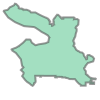

In [14]:
Shape1

In [15]:
Shape2 = Polygon(district_api["features"][0]["geometry"]["coordinates"][1][0])

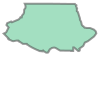

In [16]:
Shape2

In [17]:
geometry = district_api["features"][0]["geometry"]["coordinates"]

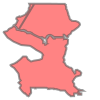

In [18]:
Polygon(geometry[0][0]+geometry[1][0])

In [19]:
fix1=district_api["features"][0]["geometry"]["coordinates"][0][0]+district_api["features"][0]["geometry"]["coordinates"][1][0]

In [20]:
Shape1=Polygon(fix1)

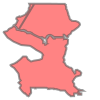

In [21]:
Shape1

In [22]:
Shape2 = Polygon(district_api["features"][2]["geometry"]["coordinates"][0])

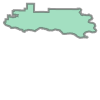

In [23]:
Shape2

In [24]:
#Heavy lifting for this feature, creates Polygons out of the coordinate locations provided in the json api.
school_district_shapes=[]
for district in district_api["features"]:
    d={}
    d["name"]=district['properties']["NAME"]
    geometry = district["geometry"]["coordinates"]
    if len(geometry) != 1:
        d["shape"]=Polygon(geometry[0][0]+geometry[1][0])
    else:
        d["shape"]=Polygon(geometry[0])
    school_district_shapes.append(d)

In [25]:
school_district_shapes[0]["shape"].contains(Point(df["Coordinates"][21579])) 

True

In [26]:
# Merging the original Dataframe with the API by checking each house's coordinate
SD = []
for sold_data_point in df["Coordinates"]:
    for shape in school_district_shapes:
        if shape["shape"].contains(Point(sold_data_point)):
            SD.append(shape["name"])    
            break

In [27]:
len(SD)

21410

In [28]:
df.shape

(21420, 22)

In [29]:
df["School District"]=pd.DataFrame({"School District":SD})

There were 186 sells that my for loop did not asign a school district too. For now I will drop them and work on ranking the schools.

In [30]:
df["School District"].isna().sum()

186

In [31]:
df.dropna(subset=["School District"], inplace=True)

In [32]:
df_school["School District"]=df_school["School District"].apply(lambda x:x.lower().replace("^a-z",''))

In [33]:
df_school.replace({"School District":{"seattle public schools":"seattle"}}, inplace=True)

In [34]:
df_school["School District"].unique()

array(['mercer island', 'lake washington', 'snoqualmie valley',
       'bellevue', 'camas', 'issaquah', 'bainbridge island', 'northshore',
       'tahoma', 'tumwater', 'ridgefield', 'shoreline', 'anacortes',
       'university place', 'lake stevens', 'hockinson', 'seattle',
       'everett', 'olympia', 'pullman', 'peninsula', 'mead', 'arlington',
       'rochester', 'bellingham', 'riverview', 'puyallup', 'orcas island',
       'cascade', 'steilacoom hist.', 'north kitsap', 'colfax', 'edmonds',
       'nooksack valley', 'sumner', 'richland', 'vashon island',
       'stanwood-camano', 'central valley', 'napavine', 'lynden',
       'snohomish', 'mukilteo', 'monroe', 'white river',
       'west valley (yakima)', 'yelm', 'sultan', 'kent', 'reardan-edwall',
       'asotin-anatone', 'port angeles', 'evergreen (clark)', 'meridian',
       'wilbur', 'north thurston public schools', 'ferndale',
       'south kitsap', 'san juan island', 'cheney', 'la center',
       'enumclaw', 'chehalis', 'washo

In [35]:
df["School District"]=df["School District"].apply(lambda x:x.lower().replace("^a-z",''))

In [36]:
df["School District"].unique()

array(['seattle', 'northshore', 'lake washington', 'federal way',
       'highline', 'tahoma', 'bellevue', 'riverview', 'auburn',
       'mercer island', 'kent', 'issaquah', 'renton', 'vashon island',
       'snoqualmie valley', 'shoreline', 'enumclaw', 'tukwila', 'fife',
       'skykomish'], dtype=object)

In [37]:
df_rank = df.merge(df_school, on="School District",how='left')

In [38]:
# Replaced any school district's that were unranked were set to 101
df_rank["State Rank"].fillna(101,inplace=True)

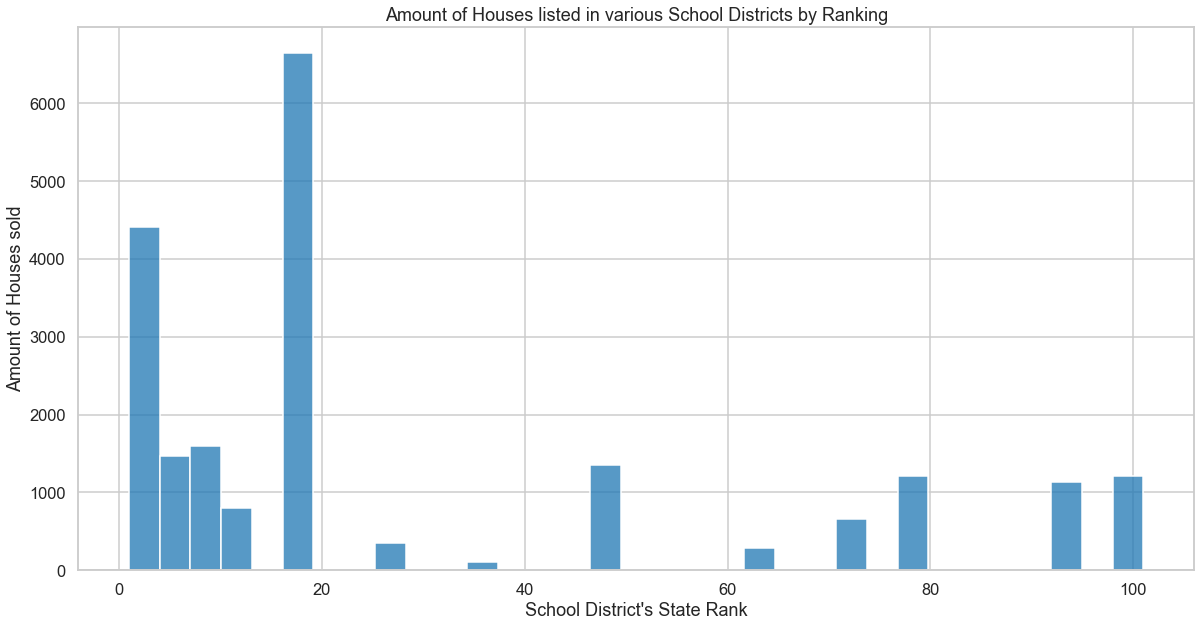

In [55]:
fig, ax = plt.subplots(figsize = (20,10))
State_Ranks_per_cost=sns.histplot(df_rank["State Rank"])
State_Ranks_per_cost.set(title="Amount of Houses listed in various School Districts by Ranking", xlabel="School District's State Rank", ylabel="Amount of Houses sold");
# plt.savefig('Amount of Houses listed in various School Districts by Ranking.png', dpi=300)

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [41]:
df_rank.sort_values(["price"],ascending=False).head(20)

id        date      price  bedrooms  bathrooms  sqft_living  \
7187   6762700020  10/13/2014  7700000.0         6       8.00        12050   
3877   9808700762   6/11/2014  7060000.0         5       4.50        10040   
9170   9208900037   9/19/2014  6890000.0         6       7.75         9890   
4371   2470100110    8/4/2014  5570000.0         5       5.75         9200   
1434   8907500070   4/13/2015  5350000.0         5       5.00         8000   
1301   7558700030   4/13/2015  5300000.0         6       6.00         7390   
1152   1247600105  10/20/2014  5110000.0         5       5.25         8010   
8023   1924059029   6/17/2014  4670000.0         5       6.75         9640   
2601   7738500731   8/15/2014  4500000.0         5       5.50         6640   
8560   3835500195   6/18/2014  4490000.0         4       3.00         6430   
12249  6065300370    5/6/2015  4210000.0         5       6.00         7440   
4110   6447300265  10/14/2014  4000000.0         4       5.50         7080   
2066   8106100105  11/14/2014  3850000.0         4       4.25         5770   
18834  2303900100   9/11/2014  3800000.0         3       4.25         5510   
6972    853200010    7/1/2014  3800000.0         5       5.50         7050   
16140  7397300170   5/30/2014  3710000.0         4       3.50         5550   
18304  4389201095   5/11/2015  3650000.0         5       3.75         5020   
6451   4217402115   4/21/2015  3650000.0         6       4.75         5480   
15104  2425049063   9/11/2014  3640000.0         4       3.25         4830   
18965  3625049042  10/11/2014  3640000.0         5       6.00         5490   

       sqft_lot  floors  waterfront  view  ...  yr_built  yr_renovated  \
7187      27600     2.5         0.0   3.0  ...      1910        1987.0   
3877      37325     2.0         1.0   2.0  ...      1940        2001.0   
9170      31374     2.0         0.0   4.0  ...      2001           0.0   
4371      35069     2.0         0.0   0.0  ...      2001           NaN   
1434      23985     2.0         0.0   4.0  ...      2009           0.0   
1301      24829     2.0         1.0   NaN  ...      1991           0.0   
1152      45517     2.0         1.0   4.0  ...      1999           0.0   
8023      13068     1.0         1.0   4.0  ...      1983        2009.0   
2601      40014     2.0         1.0   4.0  ...      2004           0.0   
8560      27517     2.0         0.0   0.0  ...      2001           0.0   
12249     21540     2.0         0.0   0.0  ...      2003           0.0   
4110      16573     2.0         0.0   0.0  ...      2008           0.0   
2066      21300     2.0         1.0   4.0  ...      1980           0.0   
18834     35000     2.0         0.0   4.0  ...      1997           0.0   
6972      42840     1.0         0.0   2.0  ...      1978           0.0   
16140     28078     2.0         0.0   2.0  ...      2000           0.0   
18304      8694     2.0         0.0   1.0  ...      2007           0.0   
6451      19401     1.5         1.0   4.0  ...      1936           0.0   
15104     22257     2.0         1.0   4.0  ...      1990           0.0   
18965     19897     2.0         0.0   0.0  ...      2005           0.0   

       zipcode      lat     long  sqft_living15  sqft_lot15  \
7187     98102  47.6298 -122.323           3940        8800   
3877     98004  47.6500 -122.214           3930       25449   
9170     98039  47.6305 -122.240           4540       42730   
4371     98039  47.6289 -122.233           3560       24345   
1434     98004  47.6232 -122.220           4600       21750   
1301     98040  47.5631 -122.210           4320       24619   
1152     98033  47.6767 -122.211           3430       26788   
8023     98040  47.5570 -122.210           3270       10454   
2601     98155  47.7493 -122.280           3030       23408   
8560     98004  47.6208 -122.219           3720       14592   
12249    98006  47.5692 -122.189           4740       19329   
4110     98039  47.6151 -122.224           3140       15996   
20

In [42]:
df_rank["State Rank"]=df_rank["State Rank"].astype(int)

In [43]:
df_backup=df_rank[["State Rank", "School District"]]

In [44]:
School_Districts_used=set(zip(df_backup["State Rank"].unique(),df_backup["School District"].apply(lambda x:x.title()).unique()))
School_Districts_used

{(1, 'Mercer Island'),
 (2, 'Lake Washington'),
 (3, 'Snoqualmie Valley'),
 (4, 'Bellevue'),
 (6, 'Issaquah'),
 (8, 'Northshore'),
 (9, 'Tahoma'),
 (12, 'Shoreline'),
 (17, 'Seattle'),
 (26, 'Riverview'),
 (37, 'Vashon Island'),
 (49, 'Kent'),
 (62, 'Enumclaw'),
 (73, 'Auburn'),
 (79, 'Renton'),
 (93, 'Federal Way'),
 (101, 'Highline')}

In [45]:
X=df_rank[["State Rank"]]
y=df_rank["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [46]:
X_test.to_numpy().reshape(1,-1)

array([[17, 17,  9, ..., 17,  2,  6]])

In [47]:
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_train)
X_train = ordinal_encoder.transform(X_train)
X_test = ordinal_encoder.transform(X_test)

In [48]:
X_train

array([[11.],
       [ 4.],
       [ 1.],
       ...,
       [ 2.],
       [ 1.],
       [ 8.]])

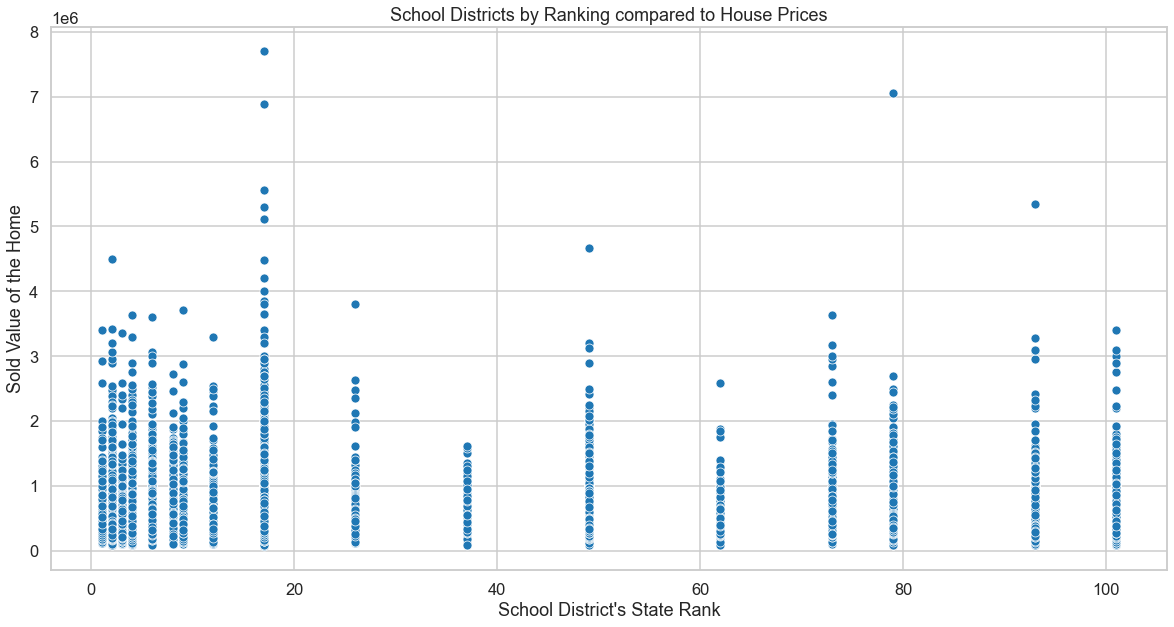

In [56]:
fig, ax = plt.subplots(figsize = (20,10))
Confirming_categorical_data=sns.scatterplot(x=df_rank["State Rank"],y=df_rank["price"])
Confirming_categorical_data.set(title="School Districts by Ranking compared to House Prices", xlabel="School District's State Rank", ylabel="Sold Value of the Home");
# plt.savefig('School Districts by Ranking compared to House Prices.png', dpi=300)

### Binning various columns to work better in preditive models.

In [78]:
df_rank.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Coordinates',
       'School District', 'State Rank'],
      dtype='object')

In [81]:
df_rank['condition'].unique()

array(['good', 'very_good', 'bad'], dtype=object)

In [80]:
# Changing condition to bins of bad, good, very good

for i in range (0, len(df_rank)):
    if df_rank['condition'].iloc[i] == 1:
        df_rank['condition'].iloc[i] = "bad"
    elif df_rank['condition'].iloc[i] == 2:
        df_rank['condition'].iloc[i] = "bad"
    elif df_rank['condition'].iloc[i] == 3:
        df_rank['condition'].iloc[i] = "good"
    elif df_rank['condition'].iloc[i] == 4:
        df_rank['condition'].iloc[i] = "very_good"
    elif df_rank['condition'].iloc[i] == 5:
        df_rank['condition'].iloc[i] = "very_good"

C:\Users\Catherine\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [85]:
df_rank['grade'].unique()

array(['good', 'bad', 'very_good'], dtype=object)

In [84]:
# Changing grade to bins of bad, good, very good
for i in range (0, len(df_rank)):
    if df_rank['grade'].iloc[i] == 3:
        df_rank['grade'].iloc[i] = "bad"
    elif df_rank['grade'].iloc[i] == 4:
        df_rank['grade'].iloc[i] = "bad"
    elif df_rank['grade'].iloc[i] == 5:
        df_rank['grade'].iloc[i] = "bad"
    elif df_rank['grade'].iloc[i] == 6:
        df_rank['grade'].iloc[i] = "bad"
    elif df_rank['grade'].iloc[i] == 7:
        df_rank['grade'].iloc[i] = "good"
    elif df_rank['grade'].iloc[i] == 8:
        df_rank['grade'].iloc[i] = "good"
    elif df_rank['grade'].iloc[i] == 9:
        df_rank['grade'].iloc[i] = "good"
    elif df_rank['grade'].iloc[i] == 10:
        df_rank['grade'].iloc[i] = 'very_good'
    elif df_rank['grade'].iloc[i] == 11:
        df_rank['grade'].iloc[i] = 'very_good'
    elif df_rank['grade'].iloc[i] == 12:
        df_rank['grade'].iloc[i] = 'very_good'
    elif df_rank['grade'].iloc[i] == 13:
        df_rank['grade'].iloc[i] = 'very_good'

In [87]:
df_rank['bathrooms'].unique()

array(['minimal', 'average', 'many'], dtype=object)

In [86]:
# Changing bathrooms to minimal, average, many
for i in range (0, len(df_rank)):
    if df_rank["bathrooms"].iloc[i] == 0.5:
        df_rank["bathrooms"].iloc[i] = "minimal"
    elif df_rank["bathrooms"].iloc[i] == 0.75:
        df_rank["bathrooms"].iloc[i] = "minimal"
    elif df_rank["bathrooms"].iloc[i] == 1:
        df_rank["bathrooms"].iloc[i] = "minimal"
    elif df_rank["bathrooms"].iloc[i] == 1.25:
        df_rank["bathrooms"].iloc[i] = "minimal"
    elif df_rank["bathrooms"].iloc[i] == 1.5:
        df_rank["bathrooms"].iloc[i] = "minimal"
    elif df_rank["bathrooms"].iloc[i] == 1.75:
        df_rank["bathrooms"].iloc[i] = "minimal"
    elif df_rank["bathrooms"].iloc[i] == 2.0:
        df_rank["bathrooms"].iloc[i] = "minimal"
    elif df_rank["bathrooms"].iloc[i] == 2.25:
        df_rank["bathrooms"].iloc[i] = "minimal"
    elif df_rank["bathrooms"].iloc[i] == 2.5:
        df_rank["bathrooms"].iloc[i] = "minimal"
    elif df_rank["bathrooms"].iloc[i] == 2.75:
        df_rank["bathrooms"].iloc[i] = "minimal"
    elif df_rank["bathrooms"].iloc[i] == 3.0:
        df_rank["bathrooms"].iloc[i] = "average"
    elif df_rank["bathrooms"].iloc[i] == 3.25:
        df_rank["bathrooms"].iloc[i] = "average"
    elif df_rank["bathrooms"].iloc[i] == 3.5:
        df_rank["bathrooms"].iloc[i] = "average"
    elif df_rank["bathrooms"].iloc[i] == 3.75:
        df_rank["bathrooms"].iloc[i] = "average"
    elif df_rank["bathrooms"].iloc[i] == 4.0:
        df_rank["bathrooms"].iloc[i] = "average"
    elif df_rank["bathrooms"].iloc[i] == 4.25:
        df_rank["bathrooms"].iloc[i] = "average"
    elif df_rank["bathrooms"].iloc[i] == 4.5:
        df_rank["bathrooms"].iloc[i] = "average"
    elif df_rank["bathrooms"].iloc[i] == 4.75:
        df_rank["bathrooms"].iloc[i] = "average"
    elif df_rank["bathrooms"].iloc[i] == 5.0:
        df_rank["bathrooms"].iloc[i] = "average"
    elif df_rank["bathrooms"].iloc[i] == 5.25:
        df_rank["bathrooms"].iloc[i] = "average"
    elif df_rank["bathrooms"].iloc[i] == 5.5:
        df_rank["bathrooms"].iloc[i] = "average"
    elif df_rank["bathrooms"].iloc[i] == 5.75:
        df_rank["bathrooms"].iloc[i] = "many"
    elif df_rank["bathrooms"].iloc[i] == 6.0:
        df_rank["bathrooms"].iloc[i] = "many"
    elif df_rank["bathrooms"].iloc[i] == 6.25:
        df_rank["bathrooms"].iloc[i] = "many"
    elif df_rank["bathrooms"].iloc[i] == 6.5:
        df_rank["bathrooms"].iloc[i] = "many"
    elif df_rank["bathrooms"].iloc[i] == 6.75:
        df_rank["bathrooms"].iloc[i] = "many"
    elif df_rank["bathrooms"].iloc[i] == 7.5:
        df_rank["bathrooms"].iloc[i] = "many"
    elif df_rank["bathrooms"].iloc[i] == 7.75:
        df_rank["bathrooms"].iloc[i] = "many"
    elif df_rank["bathrooms"].iloc[i] == 8.0:
        df_rank["bathrooms"].iloc[i] = "many"

In [89]:
set(df_rank['bedrooms'].unique())

{'excessive', 'moderate', 'small'}

In [88]:
# Changing
for i in range (0, len(df_rank)):
    if df_rank['bedrooms'].iloc[i] == 1:
        df_rank['bedrooms'].iloc[i] = "small"
    elif df_rank['bedrooms'].iloc[i] == 2:
        df_rank['bedrooms'].iloc[i] = "small"
    elif df_rank['bedrooms'].iloc[i] == 3:
        df_rank['bedrooms'].iloc[i] = "small"
    elif df_rank['bedrooms'].iloc[i] == 4:
        df_rank['bedrooms'].iloc[i] = "small"
    elif df_rank['bedrooms'].iloc[i] == 5:
        df_rank['bedrooms'].iloc[i] = "moderate"
    elif df_rank['bedrooms'].iloc[i] == 6:
        df_rank['bedrooms'].iloc[i] = "moderate"
    elif df_rank['bedrooms'].iloc[i] == 7:
        df_rank['bedrooms'].iloc[i] = "moderate"
    elif df_rank['bedrooms'].iloc[i] == 8:
        df_rank['bedrooms'].iloc[i] = 'moderate'
    elif df_rank['bedrooms'].iloc[i] == 9:
        df_rank['bedrooms'].iloc[i] = 'excessive'
    elif df_rank['bedrooms'].iloc[i] == 10:
        df_rank['bedrooms'].iloc[i] = 'excessive'
    elif df_rank['bedrooms'].iloc[i] == 11:
        df_rank['bedrooms'].iloc[i] = 'excessive'
    elif df_rank['bedrooms'].iloc[i] == 33:
        df_rank['bedrooms'].iloc[i] = 'excessive'

In [95]:
(df_rank['State Rank'].unique())

array(['11-50', 'Top_ten', '51-above'], dtype=object)

In [94]:
# Changing bathrooms to Top_ten, 11-50, 51-above
for i in range (0, len(df_rank)):
    if df_rank['State Rank'].iloc[i] == 1:
        df_rank['State Rank'].iloc[i] = "Top_ten"
    elif df_rank['State Rank'].iloc[i] == 2:
        df_rank['State Rank'].iloc[i] = "Top_ten"
    elif df_rank['State Rank'].iloc[i] == 3:
        df_rank['State Rank'].iloc[i] = "Top_ten"
    elif df_rank['State Rank'].iloc[i] == 3:
        df_rank['State Rank'].iloc[i] = "Top_ten"
    elif df_rank['State Rank'].iloc[i] == 4:
        df_rank['State Rank'].iloc[i] = "Top_ten"
    elif df_rank['State Rank'].iloc[i] == 6:
        df_rank['State Rank'].iloc[i] = "Top_ten"
    elif df_rank['State Rank'].iloc[i] == 8:
        df_rank['State Rank'].iloc[i] = "Top_ten"
    elif df_rank['State Rank'].iloc[i] == 9:
        df_rank['State Rank'].iloc[i] = "Top_ten"
    elif df_rank['State Rank'].iloc[i] == 12:
        df_rank['State Rank'].iloc[i] = "11-50"
    elif df_rank['State Rank'].iloc[i] == 17:
        df_rank['State Rank'].iloc[i] = "11-50"
    elif df_rank['State Rank'].iloc[i] == 26:
        df_rank['State Rank'].iloc[i] = "11-50"
    elif df_rank['State Rank'].iloc[i] == 37:
        df_rank['State Rank'].iloc[i] = "11-50"
    elif df_rank['State Rank'].iloc[i] == 49:
        df_rank['State Rank'].iloc[i] = "11-50"
    elif df_rank['State Rank'].iloc[i] == 62:
        df_rank['State Rank'].iloc[i] = "51-above"
    elif df_rank['State Rank'].iloc[i] == 73:
        df_rank['State Rank'].iloc[i] = "51-above"
    elif df_rank['State Rank'].iloc[i] == 79:
        df_rank['State Rank'].iloc[i] = "51-above"
    elif df_rank['State Rank'].iloc[i] == 93:
        df_rank['State Rank'].iloc[i] = "51-above"
    elif df_rank['State Rank'].iloc[i] == 101:
        df_rank['State Rank'].iloc[i] = "51-above"

In [96]:
df_rank.head()

id        date     price bedrooms bathrooms  sqft_living  sqft_lot  \
0  7129300520  10/13/2014  221900.0    small   minimal         1180      5650   
1  6414100192   12/9/2014  538000.0    small   minimal         2570      7242   
2  5631500400   2/25/2015  180000.0    small   minimal          770     10000   
3  2487200875   12/9/2014  604000.0    small   average         1960      5000   
4  1954400510   2/18/2015  510000.0    small   minimal         1680      8080   

   floors  waterfront  view  ... yr_built yr_renovated  zipcode      lat  \
0     1.0         NaN   0.0  ...     1955          0.0    98178  47.5112   
1     2.0         0.0   0.0  ...     1951       1991.0    98125  47.7210   
2     1.0         0.0   0.0  ...     1933          NaN    98028  47.7379   
3     1.0         0.0   0.0  ...     1965          0.0    98136  47.5208   
4     1.0         0.0   0.0  ...     1987          0.0    98074  47.6168   

      long  sqft_living15  sqft_lot15                     Coordinates  \
0 -122.257           1340        5650             (-122.257, 47.5112)   
1 -122.319           1690        7639  (-122.319, 47.721000000000004)   
2 -122.233           2720        8062  (-122.23299999999999, 47.7379)   
3 -122.393           1360        5000  (-122.39299999999999, 47.5208)   
4 -122.045           1800        7503             (-122.045, 47.6168)   

   School District  State Rank  
0          seattle       11-50  
1          seattle       11-50  
2       northshore     Top_ten  
3          seattle       11-50  
4  lake washington     Top_ten  

[5 rows x 24 columns]

In [97]:
model_df=df_rank.copy()

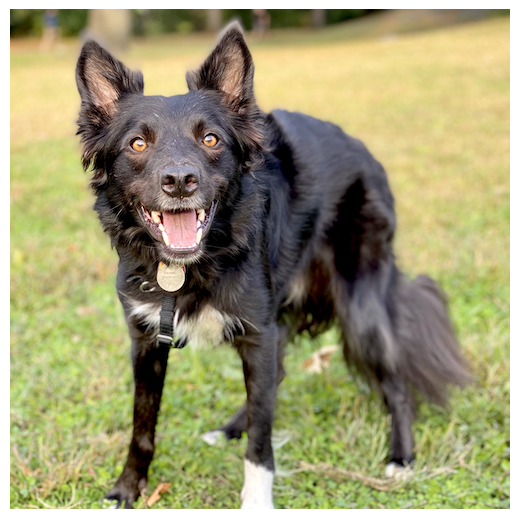

In [100]:
sns.dogplot(data = model_df)

#### Created csv file for Hayden's models to run off of

In [99]:
# model_df.to_csv("Df with State Rank plus binned columns.csv")

<hr><font color="green"><h1>from file: CHayden1</h1></font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

In [2]:
df = pd.read_csv('../../../data/Df with State Rank plus binned columns.csv',index_col="Unnamed: 0")
df.head()

id        date     price bedrooms bathrooms  sqft_living  sqft_lot  \
0  7129300520  10/13/2014  221900.0    small   minimal         1180      5650   
1  6414100192   12/9/2014  538000.0    small   minimal         2570      7242   
2  5631500400   2/25/2015  180000.0    small   minimal          770     10000   
3  2487200875   12/9/2014  604000.0    small   average         1960      5000   
4  1954400510   2/18/2015  510000.0    small   minimal         1680      8080   

   floors  waterfront  view  ... yr_built yr_renovated  zipcode      lat  \
0     1.0         NaN   0.0  ...     1955          0.0    98178  47.5112   
1     2.0         0.0   0.0  ...     1951       1991.0    98125  47.7210   
2     1.0         0.0   0.0  ...     1933          NaN    98028  47.7379   
3     1.0         0.0   0.0  ...     1965          0.0    98136  47.5208   
4     1.0         0.0   0.0  ...     1987          0.0    98074  47.6168   

      long  sqft_living15  sqft_lot15                     Coordinates  \
0 -122.257           1340        5650             (-122.257, 47.5112)   
1 -122.319           1690        7639  (-122.319, 47.721000000000004)   
2 -122.233           2720        8062  (-122.23299999999999, 47.7379)   
3 -122.393           1360        5000  (-122.39299999999999, 47.5208)   
4 -122.045           1800        7503             (-122.045, 47.6168)   

   School District  State Rank  
0          seattle       11-50  
1          seattle       11-50  
2       northshore     Top_ten  
3          seattle       11-50  
4  lake washington     Top_ten  

[5 rows x 24 columns]

In [3]:
df = df.drop_duplicates()

In [4]:
df.date = df["date"].map(lambda x: x.split("/")[0])

In [5]:
df['date'] = df['date'].map(lambda x: int(x))

In [6]:
df.waterfront = df.waterfront.replace(np.NaN, 0.0)

In [7]:
df = df.fillna(0.0)

In [8]:
df.columns = df.columns.str.replace(" ", "_")

In [9]:
df.columns = df.columns.str.lower().str.replace(".0", "")

In [10]:
df_corr_price = df.corr()['price'].map(abs).sort_values(ascending=False)
df_corr_price

price            1.000000
sqft_living      0.700673
sqft_above       0.603899
sqft_living15    0.585329
view             0.394476
lat              0.306950
waterfront       0.263315
floors           0.259331
yr_renovated     0.119919
sqft_lot         0.088113
sqft_lot15       0.080797
yr_built         0.049736
zipcode          0.049642
id               0.019255
long             0.018177
date             0.009518
Name: price, dtype: float64

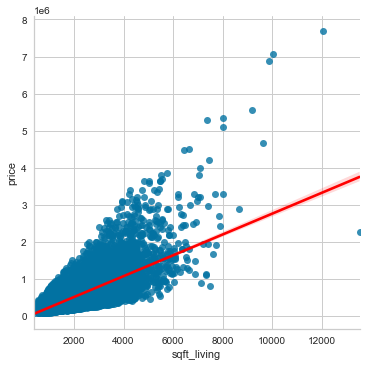

In [11]:
sns.lmplot(x='sqft_living', y='price', data=df, line_kws={'color': 'red'})
plt.show();

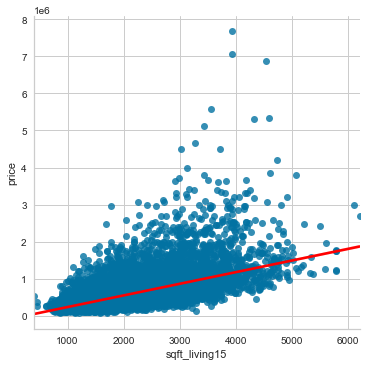

In [12]:
sns.lmplot(x='sqft_living15', y='price', data=df, line_kws={'color': 'red'})
plt.show();

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21234 entries, 0 to 21233
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21234 non-null  int64  
 1   date             21234 non-null  int64  
 2   price            21234 non-null  float64
 3   bedrooms         21234 non-null  object 
 4   bathrooms        21234 non-null  object 
 5   sqft_living      21234 non-null  int64  
 6   sqft_lot         21234 non-null  int64  
 7   floors           21234 non-null  float64
 8   waterfront       21234 non-null  float64
 9   view             21234 non-null  float64
 10  condition        21234 non-null  object 
 11  grade            21234 non-null  object 
 12  sqft_above       21234 non-null  int64  
 13  sqft_basement    21234 non-null  object 
 14  yr_built         21234 non-null  int64  
 15  yr_renovated     21234 non-null  float64
 16  zipcode          21234 non-null  int64  
 17  lat         

In [14]:
dropped_columns = ['school_district', 'coordinates',
                  'sqft_lot', 'sqft_lot15', 'sqft_living15', 'long', 'zipcode', 'yr_renovated',
                  'yr_built', 'sqft_basement', 'grade', 'condition', 'view', 'floors',
                  'bedrooms', 'id', 'date', 'price']

# **Baseline Model no Change**

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
predictors = df.drop(columns=dropped_columns)
predict= '+'.join(predictors)
f = 'price ~' + predict
model_df = ols(formula=f, data=df).fit()
model_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     4231.
Date:                Fri, 02 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:03:46   Log-Likelihood:            -2.9207e+05
No. Observations:               21234   AIC:                         5.842e+05
Df Residuals:                   21225   BIC:                         5.842e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -3.413e+07    5.4e+05    -63.217      0.000   -3.52e+07   -3.31e+07
bathrooms[T.many]       9.381e+05   5.32e+04     17.632      0.000    8.34e+05    1.04e+06
bathrooms[T.minimal]   -1.034e+05   5659.605    -18.265      0.000   -1.14e+05   -9.23e+04
state_rank[T.51-above]  -922.5169   4139.621     -0.223      0.824   -9036.488    7191.454
state_rank[T.Top_ten]    128.0513   3541.303      0.036      0.971   -6813.171    7069.274
sqft_living              228.7270      3.752     60.954      0.000     221.372     236.082
waterfront              8.728e+05   1.91e+04     45.680      0.000    8.35e+05     9.1e+05
sqft_above                16.4125      3.939      4.166      0.000       8.691      24.134
lat                     7.201e+05   1.13e+04     63.472      0.000    6.98e+05    7.42e+05
==============================================================================
Omnibus:                    13746.579   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           523323.418
Skew:                           2.571   Prob(JB):                         0.00
Kurtosis:                      26.771   Cond. No.                     1.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
dropped_columns_new = ['school_district', 'coordinates',
                  'sqft_lot', 'sqft_lot15', 'long', 'zipcode', 'yr_renovated',
                  'yr_built', 'view', 'floors', 'id', 'date']

In [17]:
df = df.drop(columns=dropped_columns_new)

In [18]:
df.head()

price bedrooms bathrooms  sqft_living  waterfront  condition grade  \
0  221900.0    small   minimal         1180         0.0       good  good   
1  538000.0    small   minimal         2570         0.0       good  good   
2  180000.0    small   minimal          770         0.0       good   bad   
3  604000.0    small   average         1960         0.0  very_good  good   
4  510000.0    small   minimal         1680         0.0       good  good   

   sqft_above sqft_basement      lat  sqft_living15 state_rank  
0        1180           0.0  47.5112           1340      11-50  
1        2170         400.0  47.7210           1690      11-50  
2         770           0.0  47.7379           2720    Top_ten  
3        1050         910.0  47.5208           1360      11-50  
4        1680           0.0  47.6168           1800    Top_ten

In [19]:
df["sqft_basement"] = df["sqft_basement"].replace("0.0", np.nan)
df["sqft_basement"] = df["sqft_basement"].replace("?", np.nan)
df["sqft_basement"] = df["sqft_basement"].fillna(0.0)
df["sqft_basement"] = df["sqft_basement"].map(lambda x: float(x))

In [20]:
while df["sqft_basement"].loc[df["sqft_basement"] == 0].count() > 0:
    for i in range(0, len(df)):
        if df["sqft_basement"].iloc[i] == 0:
            df["sqft_basement"].iloc[i] = 0.1

C:\Users\Catherine\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [113]:
df_baseline = df.copy()

## Baseline Model Logged

In [134]:
continuous = ["sqft_above", "price",'sqft_living',"sqft_basement","sqft_living15","lat"]

categorical = ['bedrooms',"grade",'condition',"bathrooms","state_rank","waterfront"]

df_log = np.log(df_baseline[continuous])
df_log.columns = [f"{column}_log" for column in df_baseline[continuous]]

    
df_norm = (np.log(df_baseline[continuous]) - np.mean(np.log(df_baseline[continuous])))/np.std(np.log(df_baseline[continuous]))
df_norm.columns = [f"{column}_log" for column in df_low_price_pre[continuous]]

oe=OrdinalEncoder(categories=[['small', 'moderate', 'excessive'],["bad","good",'very_good' ],["bad","good",'very_good'],['minimal', 'average','many'],['51-above','11-50','Top_ten' ],[0,1]])
df_ohe=pd.DataFrame(oe.fit_transform(df_baseline[['bedrooms',"grade",'condition',"bathrooms","state_rank","waterfront"]]))
df2 =df_norm.join(df_ohe, how="inner")
# enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
# df_ohe=pd.DataFrame(enc.fit_transform(df_low_price_pre[categorical]))
# df_ohe.columns =enc.get_feature_names(['bedrooms',"grade",'condition',"bathrooms","state_rank"])

# df_ohe = pd.get_dummies(df_low_price_pre[categorical], columns=categorical, drop_first = True)
# df_low_price =df_norm.join(df_ohe, how="inner")
# df_low_price = pd.concat([df_norm, df_ohe], axis = 1)
#df_low_price = pd.concat([df_final1,df_low_price_pre.drop(columns=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'waterfront','condition', 'grade',
 #      'sqft_above', 'sqft_basement', 'lat', 'sqft_living15'])], axis=1)

In [135]:
while df2["sqft_basement_log"].loc[df2["sqft_basement_log"] == -0.78797255].count() > 0:
    for i in range(0, len(df2)):
        if df2["sqft_basement_log"].iloc[i] == -0.78797255:
            df2["sqft_basement_log"].iloc[i] = -2
# log base e of 0 on a graph could be read as -2. It technically goes to negative infinity but -2 will have to suffice for my estimations.

In [149]:
df2.columns

Index([   'sqft_above_log',         'price_log',   'sqft_living_log',
       'sqft_basement_log', 'sqft_living15_log',           'lat_log',
                         0,                   1,                   2,
                         3,                   4,                   5],
      dtype='object')

In [152]:
# dropped_columns ["sqft_above_log",'sqft_living_log',"sqft_basement_log","sqft_living15_log","lat_log",0,1,2,3,4,5]
f = df2['price_log'],df2.drop(columns="price_log")
model_df2 = ols(formula=f, data=df2).fit()
model_df2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_log   R-squared (uncentered):                   0.685
Model:                            OLS   Adj. R-squared (uncentered):              0.685
Method:                 Least Squares   F-statistic:                              4189.
Date:                Fri, 02 Jul 2021   Prob (F-statistic):                        0.00
Time:                        10:17:09   Log-Likelihood:                         -17876.
No. Observations:               21234   AIC:                                  3.577e+04
Df Residuals:                   21223   BIC:                                  3.586e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
sqft_above_log        0.2603      0.017     15.472      0.000       0.227       0.293
sqft_living_log       0.1912      0.017     11.241      0.000       0.158       0.225
sqft_basement_log     0.1344      0.009     15.523      0.000       0.117       0.151
sqft_living15_log     0.2099      0.006     35.121      0.000       0.198       0.222
lat_log               0.4152      0.004    105.942      0.000       0.408       0.423
0                    -0.1074      0.015     -7.377      0.000      -0.136      -0.079
1                     0.0407      0.009      4.655      0.000       0.024       0.058
2                     0.0217      0.006      3.490      0.000       0.010       0.034
3                     0.2683      0.014     19.535      0.000       0.241       0.295
4                    -0.0621      0.005    -12.576      0.000      -0.072      -0.052
5                     1.3879      0.047     29.502      0.000       1.296       1.480
==============================================================================
Omnibus:                      244.336   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.037
Skew:                           0.196   Prob(JB):                     5.20e-65
Kurtosis:                       3.425   Cond. No.                         25.6
==============================================================================

Notes:
[1] RÂ² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Lower Price Model

In [114]:
df_low_price_pre = df.loc[df['price']< 300000]
df_low_price_pre

price bedrooms bathrooms  sqft_living  waterfront condition grade  \
0      221900.0    small   minimal         1180         0.0      good  good   
2      180000.0    small   minimal          770         0.0      good   bad   
6      257500.0    small   minimal         1715         0.0      good  good   
7      291850.0    small   minimal         1060         0.0      good  good   
8      229500.0    small   minimal         1780         0.0      good  good   
...         ...      ...       ...          ...         ...       ...   ...   
21168  295000.0    small   minimal         1230         0.0      good  good   
21195  274800.0    small   minimal         1410         0.0      good  good   
21199  269950.0    small   minimal         2244         0.0      good  good   
21219  288790.0    small   minimal         1290         0.0      good  good   
21228  299950.0    small   minimal         1740         0.0      good  good   

       sqft_above  sqft_basement      lat  sqft_living15 state_rank  
0            1180            0.1  47.5112           1340      11-50  
2             770            0.1  47.7379           2720    Top_ten  
6            1715            0.1  47.3097           2238   51-above  
7            1060            0.1  47.4095           1650   51-above  
8            1050          730.0  47.5123           1780   51-above  
...           ...            ...      ...            ...        ...  
21168        1230            0.1  47.4380           1440   51-above  
21195        1410            0.1  47.5171           1410      11-50  
21199        2244            0.1  47.2606           2077      11-50  
21219        1060          230.0  47.5400           1370   51-above  
21228        1740            0.1  47.3697           1950      11-50  

[4374 rows x 12 columns]

In [115]:
df_low_price_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4374 entries, 0 to 21228
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4374 non-null   float64
 1   bedrooms       4374 non-null   object 
 2   bathrooms      4374 non-null   object 
 3   sqft_living    4374 non-null   int64  
 4   waterfront     4374 non-null   float64
 5   condition      4374 non-null   object 
 6   grade          4374 non-null   object 
 7   sqft_above     4374 non-null   int64  
 8   sqft_basement  4374 non-null   float64
 9   lat            4374 non-null   float64
 10  sqft_living15  4374 non-null   int64  
 11  state_rank     4374 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 444.2+ KB


In [116]:
continuous = ["sqft_above", "price",'sqft_living']

categorical = ['bedrooms',"grade",'condition',"bathrooms","state_rank"]

df_log = np.log(df_low_price_pre[continuous])
df_log.columns = [f"{column}_log" for column in df_low_price_pre[continuous]]

    
df_norm = (np.log(df_low_price_pre[continuous]) - np.mean(np.log(df_low_price_pre[continuous])))/np.std(np.log(df_low_price_pre[continuous]))
df_norm.columns = [f"{column}_log" for column in df_low_price_pre[continuous]]

oe=OrdinalEncoder(categories=[['small', 'moderate', 'excessive'],["bad","good",'very_good' ],["bad","good",'very_good'],['minimal', 'average','many'],['51-above','11-50','Top_ten' ]])
df_ohe=pd.DataFrame(oe.fit_transform(df_low_price_pre[['bedrooms',"grade",'condition',"bathrooms","state_rank"]]))
df_low_price =df_norm.join(df_ohe, how="inner")
# enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
# df_ohe=pd.DataFrame(enc.fit_transform(df_low_price_pre[categorical]))
# df_ohe.columns =enc.get_feature_names(['bedrooms',"grade",'condition',"bathrooms","state_rank"])

# df_ohe = pd.get_dummies(df_low_price_pre[categorical], columns=categorical, drop_first = True)
# df_low_price =df_norm.join(df_ohe, how="inner")
# df_low_price = pd.concat([df_norm, df_ohe], axis = 1)
#df_low_price = pd.concat([df_final1,df_low_price_pre.drop(columns=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'waterfront','condition', 'grade',
 #      'sqft_above', 'sqft_basement', 'lat', 'sqft_living15'])], axis=1)

In [117]:
display(df_norm.isna().sum(),df_ohe.isna().sum(),df_low_price.isna().sum())

sqft_above_log     0
price_log          0
sqft_living_log    0
dtype: int64

0    0
1    0
2    0
3    0
4    0
dtype: int64

sqft_above_log     0
price_log          0
sqft_living_log    0
0                  0
1                  0
2                  0
3                  0
4                  0
dtype: int64

In [118]:
df_low_price.tail(25)

sqft_above_log  price_log  sqft_living_log    0    1    2    3    4
4245       -0.352895  -1.296646        -0.640213  0.0  1.0  1.0  0.0  2.0
4246       -0.414128  -0.402234         0.542972  0.0  1.0  1.0  0.0  0.0
4249        0.152844  -1.165447        -0.169485  0.0  1.0  1.0  0.0  0.0
4251       -0.147016  -0.914701        -0.448587  0.0  1.0  1.0  0.0  1.0
4257       -0.949208  -1.921453        -1.195246  0.0  1.0  1.0  0.0  1.0
4258        0.073699  -0.314933        -0.243151  0.0  1.0  1.0  0.0  1.0
4260        0.403873   0.274020         1.498615  0.0  1.0  1.0  0.0  2.0
4273        0.726327  -1.598754         0.364298  0.0  1.0  1.0  0.0  2.0
4278       -0.476505   0.312061        -0.755267  0.0  1.0  1.0  0.0  1.0
4287        1.836602   1.006803         1.397712  0.0  1.0  1.0  0.0  2.0
4290       -1.174267  -0.145014        -1.404725  0.0  1.0  1.0  0.0  1.0
4293       -0.292765   1.014975        -0.584246  0.0  1.0  1.0  0.0  2.0
4294        0.305715   0.865668        -0.027196  0.0  1.0  1.0  0.0  1.0
4302       -0.772601   0.158031        -1.030864  0.0  1.0  1.0  0.0  2.0
4305       -0.352895  -0.082834        -0.027196  0.0  1.0  1.0  0.0  1.0
4307       -0.292765   0.126910        -0.584246  0.0  1.0  1.0  0.0  1.0
4312       -1.767209   0.496898        -0.726101  0.0  1.0  1.0  0.0  2.0
4332       -0.090454  -1.797584        -0.395940  0.0  1.0  1.0  0.0  2.0
4333       -0.704494  -0.962807        -0.967472  0.0  0.0  1.0  0.0  2.0
4334        0.073699  -0.271878        -0.243151  0.0  1.0  1.0  0.0  2.0
4343       -1.586780  -1.584595        -1.788681  0.0  1.0  2.0  0.0  1.0
4352       -0.414128   0.118728         0.854759  0.0  1.0  1.0  0.0  0.0
4358        0.938953   0.311113         0.562205  0.0  1.0  1.0  0.0  1.0
4363        1.608613   0.019020         1.185507  0.0  1.0  1.0  0.0  2.0
4367        1.309041   0.676547         0.906673  0.0  1.0  1.0  0.0  1.0

In [119]:
X_low = df_low_price.drop(columns=['price_log'], axis=1) 
y_low = df_low_price[['price_log']]
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low, y_low, random_state=50, test_size=.25)

In [120]:
X_train_low

sqft_above_log  sqft_living_log    0    1    2    3    4
1908        2.764997         2.261838  0.0  1.0  1.0  0.0  1.0
2184        1.488499         1.073707  0.0  1.0  2.0  0.0  1.0
1126       -0.604871        -0.874746  0.0  0.0  1.0  0.0  2.0
2035        1.080121         0.693600  0.0  1.0  2.0  0.0  0.0
675        -0.772601         0.196360  0.0  0.0  1.0  0.0  1.0
...              ...              ...  ...  ...  ...  ...  ...
1237        0.126670        -0.193847  0.0  0.0  1.0  0.0  0.0
465         0.918290         0.542972  0.0  1.0  1.0  0.0  1.0
4141        0.230155        -0.097526  0.0  0.0  2.0  0.0  1.0
2201        0.834333         0.464827  0.0  1.0  2.0  0.0  2.0
3117        1.381986         0.974568  0.0  0.0  1.0  0.0  1.0

[713 rows x 7 columns]

In [121]:
f = y_train_low, X_train_low
model_low = ols(formula=f, data=X_train_low).fit()
model_low.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_log   R-squared (uncentered):                   0.217
Model:                            OLS   Adj. R-squared (uncentered):              0.209
Method:                 Least Squares   F-statistic:                              27.90
Date:                Fri, 02 Jul 2021   Prob (F-statistic):                    5.78e-34
Time:                        10:05:23   Log-Likelihood:                         -929.37
No. Observations:                 713   AIC:                                      1873.
Df Residuals:                     706   BIC:                                      1905.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
sqft_above_log      0.0340      0.057      0.597      0.550      -0.078       0.146
sqft_living_log     0.4368      0.056      7.766      0.000       0.326       0.547
0                  -0.0174      0.216     -0.081      0.936      -0.441       0.407
1                  -0.0131      0.065     -0.203      0.839      -0.140       0.114
2                  -0.0279      0.043     -0.652      0.515      -0.112       0.056
3                  -0.6612      0.450     -1.468      0.142      -1.545       0.223
4                  -0.0208      0.042     -0.499      0.618      -0.103       0.061
==============================================================================
Omnibus:                       91.925   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.405
Skew:                          -0.834   Prob(JB):                     1.33e-33
Kurtosis:                       4.522   Cond. No.                         26.4
==============================================================================

Notes:
[1] RÂ² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
df_low_price.corr()['price_log'].map(abs).sort_values(ascending=False)

price_log          1.000000
sqft_living_log    0.437888
sqft_above_log     0.351663
4                  0.047681
3                  0.025228
1                  0.020836
0                  0.019080
2                  0.005755
Name: price_log, dtype: float64

In [123]:
linreg_low = LinearRegression()
linreg_low.fit(X_train_low, y_train_low)

predicted_y_low = linreg_low.predict(X_test_low) 

linreg_low.score(X_test_low, y_test_low)

0.11486542870474126

In [124]:
lr_low = LinearRegression()

In [125]:
lr_low.fit(X_train_low, y_train_low)

LinearRegression()

In [126]:
from sklearn.model_selection import KFold

folds = KFold(10, shuffle = True)
train_train_scores = []
train_test_scores = []
train_train_rmse = []
train_test_rmse = []
for train_ind, test_ind in folds.split(X_train_low):
    X_train_low_train = X_train_low.iloc[train_ind]
    X_train_low_test = X_train_low.iloc[test_ind]
    y_train_low_train = y_train_low.iloc[train_ind]
    y_train_low_test = y_train_low.iloc[test_ind]
    linreg_low1 = LinearRegression()
    linreg_low1.fit(X_train_low_train, y_train_low_train)
    train_train_scores.append(linreg_low1.score(X_train_low_train, y_train_low_train))
    train_test_scores.append(linreg_low1.score(X_train_low_test, y_train_low_test))
    train_train_rmse.append(np.sqrt(mse(y_train_low_train, linreg_low1.predict(X_train_low_train))))
    train_test_rmse.append(np.sqrt(mse(y_train_low_test, linreg_low1.predict(X_train_low_test))))
    

In [127]:
train_test_scores

[0.03279303850228954,
 -0.04785296127563221,
 0.23988533349763774,
 0.20619652952607193,
 0.23204249752746953,
 0.27188879917650977,
 0.16036099850537433,
 0.23181595274757094,
 0.3362298012578102,
 0.14070741904301642]

In [128]:
train_train_scores

[0.2291997970900327,
 0.23319137719949612,
 0.21006269370320674,
 0.2144614301721448,
 0.21026110624880678,
 0.2059298934754733,
 0.21537981242546356,
 0.21084077456994266,
 0.19820092913688048,
 0.2211194859886665]

In [129]:
train_train_rmse

[0.8888162715953628,
 0.8902893665251644,
 0.8949139505458257,
 0.8744375071259516,
 0.8783457317965945,
 0.8960099752727023,
 0.9006225812001639,
 0.8998159865144892,
 0.8945781164288032,
 0.8828180345185134]

In [130]:
train_test_rmse

[0.9106502402902359,
 0.9027027173271078,
 0.854155249255391,
 1.028731868411084,
 0.9998843996022898,
 0.8490213129479484,
 0.7992331659114853,
 0.8117900353105011,
 0.8577820353230015,
 0.9667598810320344]

In [131]:
display(linreg_low.score(X_test_low, y_test_low),statistics.mean(train_train_scores),statistics.mean(train_test_scores))

0.11486542870474126

0.21486473000101136

0.18040674085081182

### Model visualizes

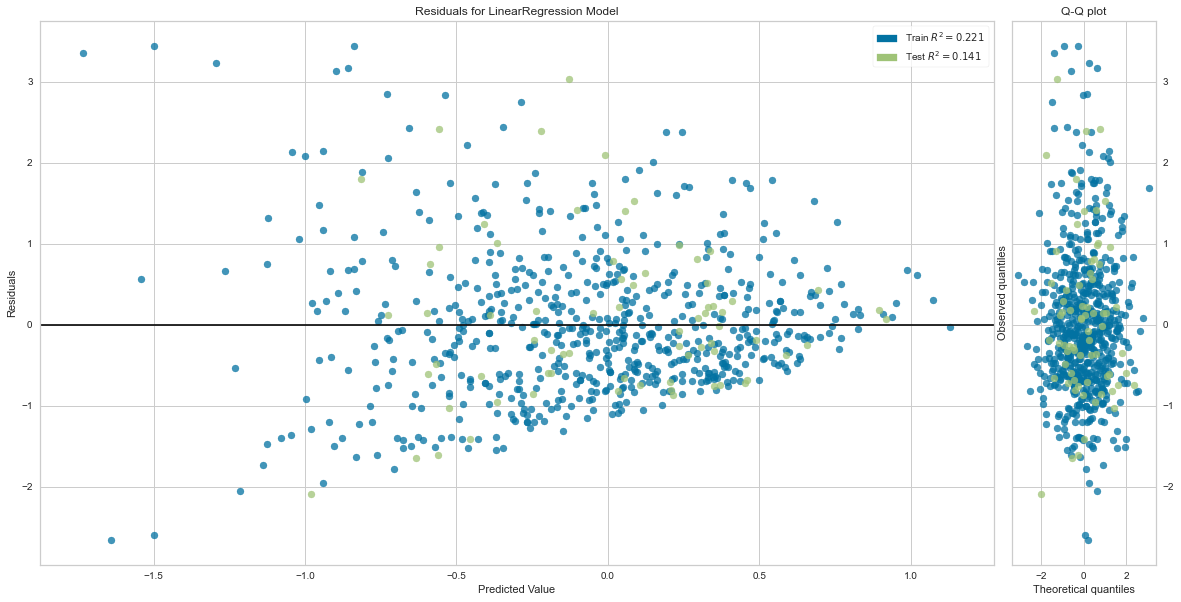

In [132]:
fig, ax = plt.subplots(figsize = (20,10))
visualizer_low = ResidualsPlot(linreg_low1, hist=False, qqplot=True)
visualizer_low.fit(X_train_low_train, y_train_low_train)
visualizer_low.score(X_train_low_test, y_train_low_test)
visualizer_low.show();
# plt.savefig('Linear Regression Model Lower plus QQ plot.png', dpi=300)

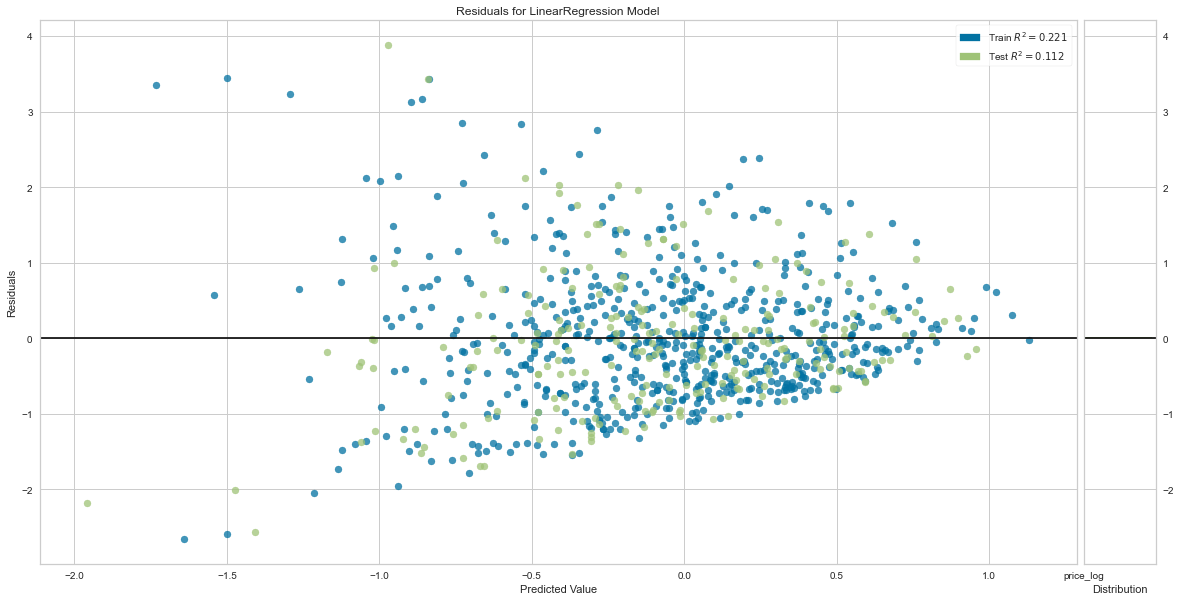

In [133]:
fig, ax = plt.subplots(figsize = (20,10))
visualizer_low = ResidualsPlot(linreg_low1)
visualizer_low.fit(X_train_low_train, y_train_low_train)
visualizer_low.score(X_test_low, y_test_low)
visualizer_low.show();
# plt.savefig('Linear Regression Model Lower Price.png', dpi=300)

## Middle Price Model

In [41]:
df_middle_price_pre = df.loc[(300000 <= df['price']) & (df['price'] < 650000)]
df_middle_price_pre.head()

price bedrooms bathrooms  sqft_living  waterfront  condition grade  \
1   538000.0    small   minimal         2570         0.0       good  good   
3   604000.0    small   average         1960         0.0  very_good  good   
4   510000.0    small   minimal         1680         0.0       good  good   
9   323000.0    small   minimal         1890         0.0       good  good   
11  468000.0    small   minimal         1160         0.0  very_good  good   

    sqft_above  sqft_basement      lat  sqft_living15 state_rank  
1         2170          400.0  47.7210           1690      11-50  
3         1050          910.0  47.5208           1360      11-50  
4         1680            0.1  47.6168           1800    Top_ten  
9         1890            0.1  47.3684           2390    Top_ten  
11         860          300.0  47.6900           1330      11-50

In [42]:
df_middle_price_pre.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'waterfront',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'lat',
       'sqft_living15', 'state_rank'],
      dtype='object')

In [43]:
continuous = ["sqft_above", "price", "sqft_living15","sqft_living","lat"]

categorical = ['bathrooms',"grade","state_rank"]

df_log = np.log(df_middle_price_pre[continuous])
df_log.columns = [f"{column}_log" for column in df_middle_price_pre[continuous]]

    
df_norm = (np.log(df_middle_price_pre[continuous]) - np.mean(np.log(df_middle_price_pre[continuous])))/np.std(np.log(df_middle_price_pre[continuous]))
df_norm.columns = [f"{column}_log" for column in df_middle_price_pre[continuous]]

oe=OrdinalEncoder(categories=[['small', 'moderate', 'excessive'],["bad","good",'very_good' ],['51-above','11-50','Top_ten' ]])
df_ohe=pd.DataFrame(oe.fit_transform(df_middle_price_pre[['bedrooms',"grade","state_rank"]]))
df_middle_price =df_norm.join(df_ohe, how="inner")

# df_ohe = pd.get_dummies(df_middle_price_pre[categorical], columns=categorical, drop_first = True)

# df_middle_price = pd.concat([df_norm, df_ohe], axis = 1)
#df_middle_price = pd.concat([df_final1,df_middle_price_pre.drop(columns=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'waterfront','condition', 'grade',
 #      'sqft_above', 'sqft_basement', 'lat', 'sqft_living15'])], axis=1)

In [47]:
df_middle_price.head()

sqft_above_log  price_log  sqft_living15_log  sqft_living_log   lat_log  \
1         0.942395   0.931581          -0.257614         1.018252  1.026767   
3        -1.035681   1.468905          -1.070820         0.235002 -0.458946   
4         0.245012   0.683397          -0.021569        -0.210591  0.254263   
9         0.565955  -1.437556           1.039679         0.129876 -1.594130   
11       -1.579599   0.284324          -1.154317        -1.281207  0.797120   

      0    1    2  
1   0.0  1.0  1.0  
3   0.0  1.0  2.0  
4   0.0  1.0  1.0  
9   0.0  1.0  1.0  
11  0.0  1.0  1.0

In [45]:
X_middle = df_middle_price.drop(columns=['price_log'], axis=1) 
y_middle = df_middle_price[['price_log']]
X_train_middle, X_test_middle, y_train_middle, y_test_middle = train_test_split(X_middle, y_middle, random_state=50, test_size=.25)

In [46]:
f = y_train_middle, X_train_middle
model_mid = ols(formula=f, data=X_train_middle).fit()
model_mid.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_log   R-squared (uncentered):                   0.248
Model:                            OLS   Adj. R-squared (uncentered):              0.247
Method:                 Least Squares   F-statistic:                              222.5
Date:                Fri, 02 Jul 2021   Prob (F-statistic):                   1.45e-286
Time:                        09:09:21   Log-Likelihood:                         -6003.4
No. Observations:                4722   AIC:                                  1.202e+04
Df Residuals:                    4715   BIC:                                  1.207e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
sqft_above_log       -0.0167      0.021     -0.790      0.429      -0.058       0.025
sqft_living15_log     0.1888      0.017     11.114      0.000       0.156       0.222
sqft_living_log       0.2984      0.021     13.966      0.000       0.256       0.340
lat_log               0.4255      0.013     31.951      0.000       0.399       0.452
0                    -0.0250      0.048     -0.518      0.605      -0.120       0.070
1                    -0.0113      0.022     -0.520      0.603      -0.054       0.031
2                    -0.0087      0.016     -0.563      0.573      -0.039       0.022
==============================================================================
Omnibus:                      283.535   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.641
Skew:                           0.059   Prob(JB):                     6.97e-24
Kurtosis:                       2.273   Cond. No.                         6.18
==============================================================================

Notes:
[1] RÂ² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
df_middle_price.corr()['price_log'].map(abs).sort_values(ascending=False)

price_log            1.000000
lat_log              0.292501
sqft_living_log      0.268313
sqft_living15_log    0.247759
sqft_above_log       0.190731
1                    0.008346
0                    0.005438
2                    0.004484
Name: price_log, dtype: float64

In [49]:
linreg_mid = LinearRegression()
linreg_mid.fit(X_train_middle, y_train_middle)

predicted_y_middle = linreg_mid.predict(X_test_middle) 

linreg_mid.score(X_test_middle, y_test_middle)

0.2574411687948791

In [50]:
lr_middle = LinearRegression()

In [51]:
lr_middle.fit(X_train_middle, y_train_middle)

LinearRegression()

In [52]:
folds2 = KFold(10, shuffle = True)
train_train_scores_mid = []
train_test_scores_mid = []
train_train_rmse_mid = []
train_test_rmse_mid = []
for train_ind_mid, test_ind_mid in folds2.split(X_train_middle):
    X_train_mid_train = X_train_middle.iloc[train_ind_mid]
    X_train_mid_test = X_train_middle.iloc[test_ind_mid]
    y_train_mid_train = y_train_middle.iloc[train_ind_mid]
    y_train_mid_test = y_train_middle.iloc[test_ind_mid]
    linreg_mid = LinearRegression()
    linreg_mid.fit(X_train_mid_train, y_train_mid_train)
    train_train_scores_mid.append(linreg_mid.score(X_train_mid_train, y_train_mid_train))
    train_test_scores_mid.append(linreg_mid.score(X_train_mid_test, y_train_mid_test))
    train_train_rmse_mid.append(np.sqrt(mse(y_train_mid_train, linreg_mid.predict(X_train_mid_train))))
    train_test_rmse_mid.append(np.sqrt(mse(y_train_mid_test, linreg_mid.predict(X_train_mid_test))))

In [53]:
train_train_scores_mid

[0.25101333245770896,
 0.2478497548555082,
 0.2442756554269747,
 0.24612185503062922,
 0.250966984057737,
 0.2502469150145856,
 0.24900402663389487,
 0.24966803297612894,
 0.25223457620123935,
 0.24203385378089926]

In [54]:
train_test_scores_mid

[0.2204026600632515,
 0.2508303619458083,
 0.27846303859261845,
 0.26328082542031395,
 0.2200199640708984,
 0.2187731291669074,
 0.23986430839000372,
 0.2336334984464149,
 0.21233550440135185,
 0.29716035127579743]

In [55]:
train_train_rmse_mid

[0.8617170577398275,
 0.8646426742482334,
 0.8661133419120263,
 0.864529131915546,
 0.8597178508465269,
 0.8634073499526705,
 0.8621115826963471,
 0.862280847307095,
 0.8575404212364204,
 0.8650308525427828]

In [56]:
train_test_rmse_mid

[0.8730029631529538,
 0.8464209706227978,
 0.8342453304012898,
 0.8477094797419615,
 0.8914911763341503,
 0.8583130596864504,
 0.8693391447736178,
 0.8679311491809342,
 0.9094361009995163,
 0.8431192538097159]

In [112]:
display(linreg_mid.score(X_test_middle, y_test_middle),statistics.mean(train_train_scores_mid),statistics.mean(train_test_scores_mid))

0.25661890977828705

0.2483414986435306

0.2434763641773366

### Model visualizes

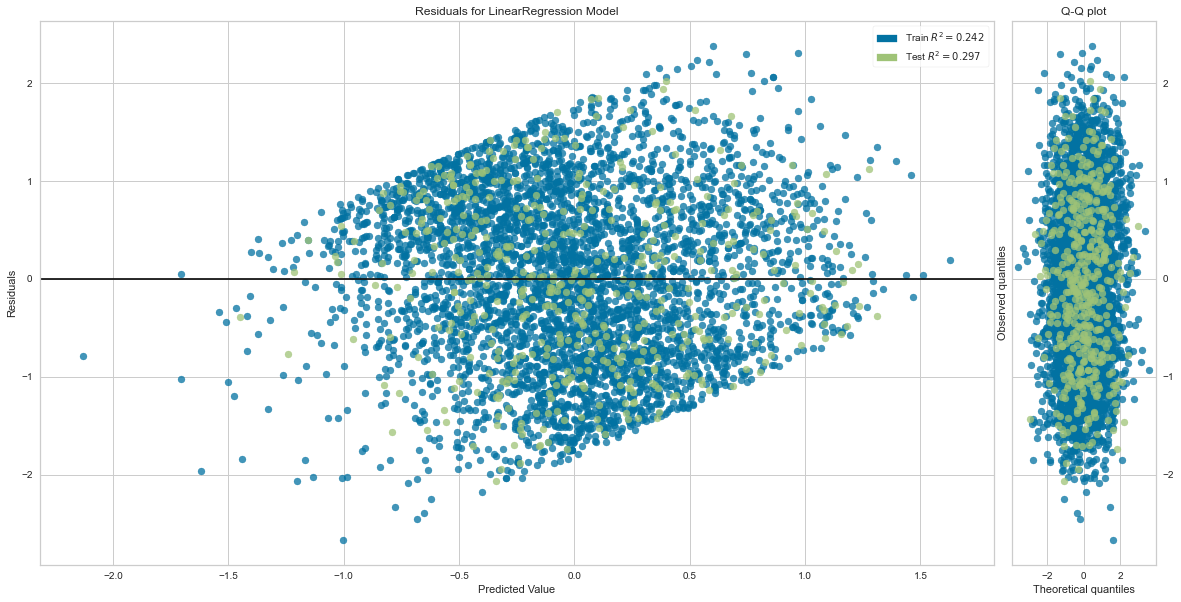

In [57]:
fig, ax = plt.subplots(figsize = (20,10))
visualizer_middle = ResidualsPlot(linreg_mid, hist=False, qqplot=True)
visualizer_middle.fit(X_train_mid_train, y_train_mid_train)
visualizer_middle.score(X_train_mid_test, y_train_mid_test)
visualizer_middle.show();
# plt.savefig('Linear Regression Model Middle Price plus QQ plot.png', dpi=300)

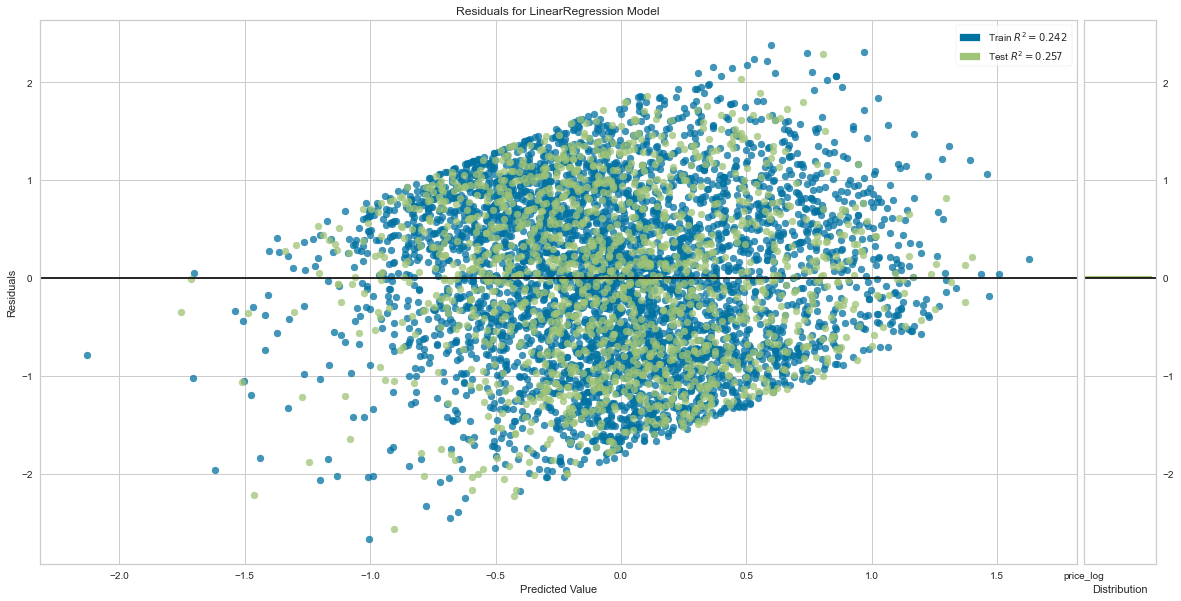

In [58]:
fig, ax = plt.subplots(figsize = (20,10))
visualizer_middle = ResidualsPlot(linreg_mid, hist=True)
visualizer_middle.fit(X_train_mid_train, y_train_mid_train)
visualizer_middle.score(X_test_middle, y_test_middle)
visualizer_middle.show();
# plt.savefig('Linear Regression Model Middle Price.png', dpi=300)

## Higher Price Model

In [61]:
df_higher_price_pre = df.loc[df['price']>= 650000]
df_higher_price_pre

price  bedrooms bathrooms  sqft_living  waterfront condition  \
5      1230000.0     small   average         5420         0.0      good   
10      662500.0     small   minimal         3560         0.0      good   
15      650000.0     small   average         2950         0.0      good   
21     2000000.0     small   minimal         3050         0.0      good   
26      937000.0     small   minimal         2450         0.0      good   
...          ...       ...       ...          ...         ...       ...   
21221   869950.0     small   minimal         3140         0.0      good   
21226   750000.0     small   minimal         2810         0.0      good   
21227   729999.0     small   minimal         1630         0.0      good   
21232   890000.0  moderate   average         4100         0.0      good   
21233  1050000.0     small   minimal         3260         0.0      good   

           grade  sqft_above  sqft_basement      lat  sqft_living15 state_rank  
5      very_good        3890         1530.0  47.6561           4760    Top_ten  
10          good        1860         1700.0  47.6007           2210    Top_ten  
15          good        1980          970.0  47.5714           2140      11-50  
21          good        2330          720.0  47.5316           4110    Top_ten  
26          good        1750          700.0  47.6386           1760      11-50  
...          ...         ...            ...      ...            ...        ...  
21221       good        3140            0.1  47.5923           3500    Top_ten  
21226       good        2810            0.1  47.7081           2990   51-above  
21227  very_good        1330          300.0  47.6113           1570      11-50  
21232  very_good        4100            0.1  47.5955           3710    Top_ten  
21233       good        2820          440.0  47.6772           2260      11-50  

[5236 rows x 12 columns]

In [62]:
df_higher_price_pre.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'waterfront',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'lat',
       'sqft_living15', 'state_rank'],
      dtype='object')

In [63]:
continuous = ["sqft_above", "price", "sqft_basement","sqft_living"]

categorical = ['bathrooms',"grade","state_rank", "waterfront"]

df_log = np.log(df_higher_price_pre[continuous])
df_log.columns = [f"{column}_log" for column in df_higher_price_pre[continuous]]

    
df_norm = (np.log(df_higher_price_pre[continuous]) - np.mean(np.log(df_higher_price_pre[continuous])))/np.std(np.log(df_higher_price_pre[continuous]))
df_norm.columns = [f"{column}_log" for column in df_higher_price_pre[continuous]]

oe=OrdinalEncoder(categories=[['small', 'moderate', 'excessive'],["bad","good",'very_good' ],['51-above','11-50','Top_ten'],[0,1]])
df_ohe=pd.DataFrame(oe.fit_transform(df_higher_price_pre[['bedrooms',"grade","state_rank", "waterfront"]]))
df_higher_price =df_norm.join(df_ohe, how="inner")

# df_ohe = pd.get_dummies(df_middle_price_pre[categorical], columns=categorical, drop_first = True)
# df_higher_price = pd.concat([df_norm, df_ohe], axis = 1)

In [65]:
df_higher_price.head()

sqft_above_log  price_log  sqft_basement_log  sqft_living_log    0    1  \
5         1.291443   0.850728           1.162223         1.939939  0.0  1.0   
10       -0.604024  -0.978295           1.185531         0.677911  1.0  1.0   
15       -0.443412  -1.034602           1.061404         0.113588  0.0  1.0   
21       -0.025257   2.287738           0.995469         0.213679  0.0  2.0   
26       -0.760630   0.046440           0.989237        -0.444015  0.0  1.0   

      2    3  
5   1.0  0.0  
10  2.0  0.0  
15  1.0  0.0  
21  2.0  0.0  
26  1.0  0.0

In [97]:
while df_higher_price["sqft_basement_log"].loc[df_higher_price["sqft_basement_log"] == -0.78797255].count() > 0:
    for i in range(0, len(df_higher_price)):
        if df_higher_price["sqft_basement_log"].iloc[i] == -0.78797255:
            df_higher_price["sqft_basement_log"].iloc[i] = -2
# log base e of 0 on a graph could be read as -2. It technically goes to negative infinity but -2 will have to suffice for my estimations.

In [98]:
X_higher = df_higher_price.drop(columns=['price_log'], axis=1) 
y_higher = df_higher_price[['price_log']]
X_train_higher, X_test_higher, y_train_higher, y_test_higher = train_test_split(X_higher, y_higher, random_state=50, test_size=.25)

In [99]:
f = y_train_higher, X_train_higher
model_high = ols(formula=f, data=X_train_higher).fit()
model_high.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              price_log   R-squared (uncentered):                   0.353
Model:                            OLS   Adj. R-squared (uncentered):              0.348
Method:                 Least Squares   F-statistic:                              76.34
Date:                Fri, 02 Jul 2021   Prob (F-statistic):                    2.84e-88
Time:                        09:58:40   Log-Likelihood:                         -1227.3
No. Observations:                 988   AIC:                                      2469.
Df Residuals:                     981   BIC:                                      2503.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
sqft_above_log        0.4413      0.090      4.887      0.000       0.264       0.618
sqft_basement_log     0.3065      0.053      5.800      0.000       0.203       0.410
sqft_living_log       0.1813      0.083      2.193      0.029       0.019       0.343
0                     0.1166      0.067      1.744      0.081      -0.015       0.248
1                    -0.0086      0.033     -0.259      0.796      -0.073       0.056
2                     0.0039      0.032      0.122      0.903      -0.059       0.067
3                     0.2287      0.196      1.167      0.244      -0.156       0.613
==============================================================================
Omnibus:                      156.633   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.389
Skew:                           1.012   Prob(JB):                     1.74e-57
Kurtosis:                       4.500   Cond. No.                         13.5
==============================================================================

Notes:
[1] RÂ² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
df_higher_price.corr()['price_log'].map(abs).sort_values(ascending=False)

price_log            1.000000
sqft_living_log      0.551281
sqft_above_log       0.443930
sqft_basement_log    0.156226
0                    0.028993
2                    0.014078
1                    0.011560
3                    0.007328
Name: price_log, dtype: float64

In [101]:
linreg_high = LinearRegression()
linreg_high.fit(X_train_higher, y_train_higher)

predicted_y_higher = linreg_high.predict(X_test_higher) 

linreg_high.score(X_test_higher, y_test_higher)

0.1799423338158017

In [102]:
lr_higher = LinearRegression()

In [103]:
lr_higher.fit(X_train_higher, y_train_higher)

LinearRegression()

In [104]:
folds3 = KFold(10, shuffle = True)
train_train_scores_high = []
train_test_scores_high = []
train_train_rmse_high = []
train_test_rmse_high = []
for train_ind_high, test_ind_high in folds3.split(X_train_higher):
    X_train_high_train = X_train_higher.iloc[train_ind_high]
    X_train_high_test = X_train_higher.iloc[test_ind_high]
    y_train_high_train = y_train_higher.iloc[train_ind_high]
    y_train_high_test = y_train_higher.iloc[test_ind_high]
    linreg_high = LinearRegression()
    linreg_high.fit(X_train_high_train, y_train_high_train)
    train_train_scores_high.append(linreg_high.score(X_train_high_train, y_train_high_train))
    train_test_scores_high.append(linreg_high.score(X_train_high_test, y_train_high_test))
    train_train_rmse_high.append(np.sqrt(mse(y_train_high_train, linreg_high.predict(X_train_high_train))))
    train_test_rmse_high.append(np.sqrt(mse(y_train_high_test, linreg_high.predict(X_train_high_test))))

In [105]:
train_train_scores_high

[0.3567477077139881,
 0.3697511924677409,
 0.34402618928714157,
 0.3561351375782461,
 0.34015231365080756,
 0.352049829415894,
 0.3615940408447129,
 0.35994572219865895,
 0.3534413634102689,
 0.35274556128238665]

In [106]:
train_test_scores_high

[0.3209723871478153,
 0.11998180193923469,
 0.43640684986568923,
 0.33206704623828964,
 0.4106927885719983,
 0.3675212506819162,
 0.2763730946408619,
 0.2936208595484674,
 0.34919524061596907,
 0.362531886412632]

In [107]:
train_train_rmse_high

[0.8413956164114406,
 0.8414579378549405,
 0.8427236876124506,
 0.8427123000697748,
 0.8250153069319843,
 0.8367296045342014,
 0.8347959533693852,
 0.8302073109088444,
 0.8385391199765517,
 0.8320506923984805]

In [108]:
train_test_rmse_high

[0.7985581074381499,
 0.8036602910849054,
 0.7876662528028838,
 0.7843389808281724,
 0.9450207669096355,
 0.842482744185716,
 0.8606976234315075,
 0.9019979440030581,
 0.8264513599124205,
 0.8827737833752283]

### Model visualizes

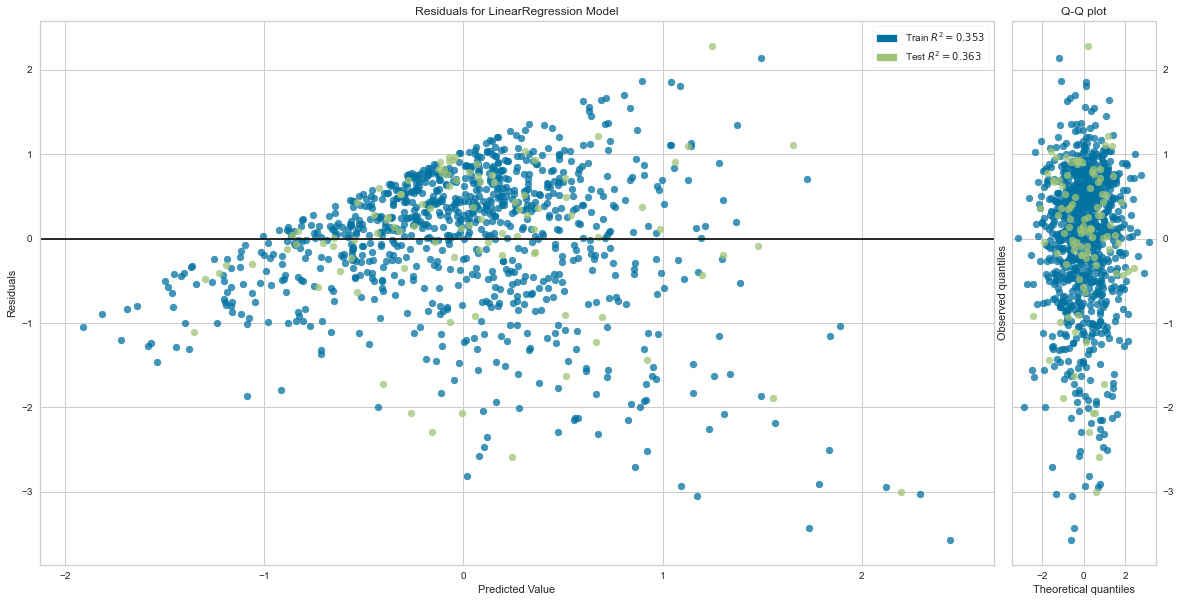

In [109]:
fig, ax = plt.subplots(figsize = (20,10))
visualizer_higher = ResidualsPlot(linreg_high, hist=False, qqplot=True)
visualizer_higher.fit(X_train_high_train, y_train_high_train)
visualizer_higher.score(X_train_high_test, y_train_high_test)
visualizer_higher.show();
# plt.savefig('Linear Regression Model Higher Price plus QQ plot.png',dpi=300);

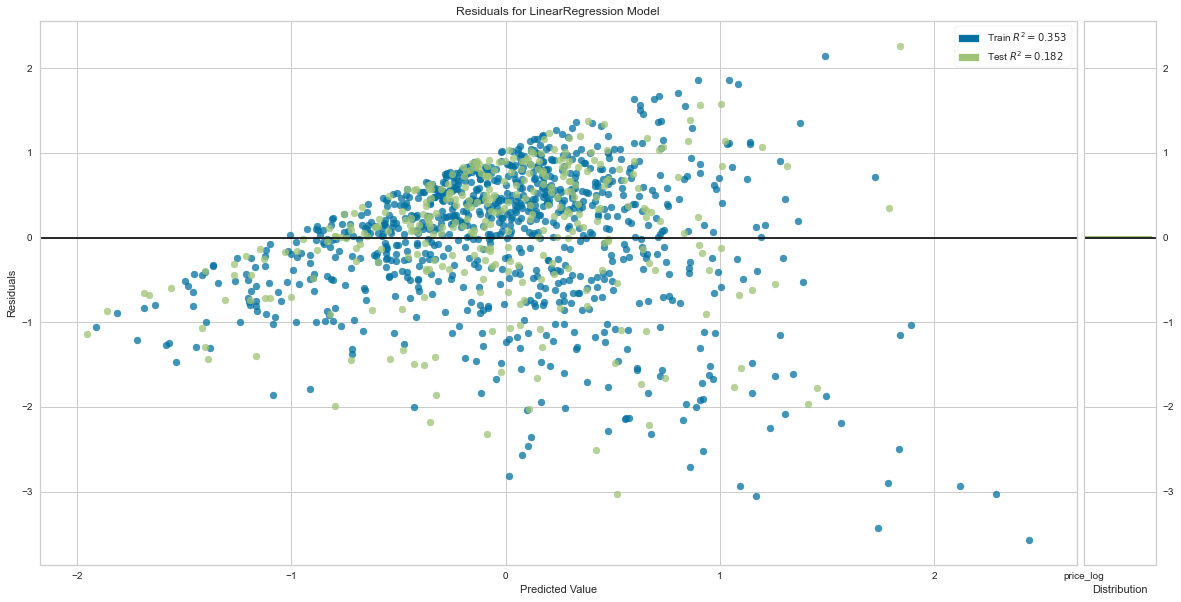

In [110]:
fig, ax = plt.subplots(figsize = (20,10))
visualizer_higher = ResidualsPlot(linreg_high)
visualizer_higher.fit(X_train_high_train, y_train_high_train)
visualizer_higher.score(X_test_higher, y_test_higher)
visualizer_higher.show();
# plt.savefig('Linear Regression Model High Price.png')